# Homework 2 - Videogames Reviews (Andrea Scalise, Antonio Pagnotta, Dario Tolazzi, Miras Tyulyubayev)

In [4]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/how-to-get-32gb-ram/train_labels.parquet
/kaggle/input/how-to-get-32gb-ram/__results__.html
/kaggle/input/how-to-get-32gb-ram/train.parquet
/kaggle/input/how-to-get-32gb-ram/submission.csv
/kaggle/input/how-to-get-32gb-ram/__notebook__.ipynb
/kaggle/input/how-to-get-32gb-ram/__output__.json
/kaggle/input/how-to-get-32gb-ram/custom.css
/kaggle/input/steam-reviews-2021/steam_reviews.csv


# RQ1: Exploratory Data Analysis (EDA)



In [5]:
# load the data from csv file to pandas dataframe
df = pd.read_csv('/kaggle/input/steam-reviews-2021/steam_reviews.csv', sep=",", header='infer', index_col=0)

In [6]:
df["timestamp_created"] = pd.to_datetime(df["timestamp_created"], unit='s')
df["timestamp_updated"] = pd.to_datetime(df["timestamp_updated"], unit='s')
df["author.last_played"] = pd.to_datetime(df["author.last_played"], unit='s')

In [4]:
# inspect the first 5 rows of the dataframe
df.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


In [5]:
# print the columns of the dataset
df.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [6]:
# get the size of the dataset
df.size

478442162

In [7]:
# get some general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21747371 entries, 0 to 21747375
Data columns (total 22 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   app_id                          int64         
 1   app_name                        object        
 2   review_id                       int64         
 3   language                        object        
 4   review                          object        
 5   timestamp_created               datetime64[ns]
 6   timestamp_updated               datetime64[ns]
 7   recommended                     bool          
 8   votes_helpful                   int64         
 9   votes_funny                     int64         
 10  weighted_vote_score             float64       
 11  comment_count                   int64         
 12  steam_purchase                  bool          
 13  received_for_free               bool          
 14  written_during_early_access     bool          
 15  a

In [8]:
# quick overview of the dataset
df.describe()

,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.174737e+07,2.174737e+07,21747371,21747371,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.172169e+07,21747369
mean,3.928181e+05,5.187500e+07,2018-12-10 09:01:13.640280320,2019-01-15 12:34:24.105696768,4.044689e+05,1.267917e+05,1.654424e-01,1.308768e-01,7.656120e+16,1.011300e+06,4.044775e+05,1.609105e+04,1.555421e+02,8.807421e+03,2020-01-31 21:11:02.058051840
min,7.000000e+01,4.300000e+01,2010-11-19 20:17:16,2010-11-19 20:17:16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970-01-01 00:00:00
25%,2.427600e+05,3.639355e+07,2017-11-09 10:19:31,2017-11-26 20:51:30,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.200000e+01,2.000000e+00,1.250000e+03,0.000000e+00,5.590000e+02,2019-11-09 19:57:56
50%,3.595500e+05,5.384058e+07,2019-07-06 20:52:52,2019-10-27 15:03:14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.100000e+01,4.000000e+00,4.307000e+03,0.000000e+00,1.881000e+03,2020-09-02 14:47:10
75%,5.780800e+05,6.928793e+07,2020-05-17 06:14:08.500000,2020-06-06 00:21:27.500000,1.000000e+00,0.000000e+00,4.827586e-01,0.000000e+00,7.656120e+16,1.450000e+02,1.000000e+01,1.491200e+04,0.000000e+00,6.823000e+03,2020-12-26 17:03:29
max,1.291340e+06,8.521867e+07,2021-01-23 18:24:47,2042-05-11 00:59:57,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06,2021-01-23 20:35:42
std,2.480977e+05,2.084267e+07,NaN,NaN,1.333741e+09,2.333553e+07,2.434006e-01,2.199398e+00,3.179134e+08,2.108829e+09,1.333741e+09,3.743057e+04,7.300488e+02,2.388553e+04,NaN


In [9]:
# check the number of missing values
df.isnull().sum()

app_id                                0
app_name                              0
review_id                             0
language                              0
review                            33748
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         25682
author.last_played                    2
dtype: int64

In [10]:
# get all the possible values for the 'language' attribute
print("Languages    = ", df.language.unique(),"\n")

Languages    =  ['schinese' 'english' 'turkish' 'spanish' 'russian' 'koreana' 'latam'
 'brazilian' 'portuguese' 'vietnamese' 'polish' 'french' 'german'
 'hungarian' 'ukrainian' 'tchinese' 'bulgarian' 'czech' 'italian' 'thai'
 'greek' 'dutch' 'finnish' 'romanian' 'japanese' 'swedish' 'danish'
 'norwegian'] 



language
english       9635437
schinese      3764967
russian       2348900
brazilian      837524
spanish        813320
german         752596
turkish        635868
koreana        613632
french         541751
polish         495529
tchinese       218203
czech          133980
italian        133307
thai           127503
japanese        81754
portuguese      81386
swedish         80226
dutch           77555
hungarian       71001
latam           70103
danish          55915
finnish         54712
norwegian       36797
romanian        32730
ukrainian       21169
greek           14472
bulgarian       10454
vietnamese       6580
Name: count, dtype: int64


Most used languages:
language
english      9635437
schinese     3764967
russian      2348900
brazilian     837524
spanish       813320
Name: count, dtype: int64

Least used languages:
language
romanian      32730
ukrainian     21169
greek         14472
bulgarian     10454
vietnamese     6580
Name: count, dtype: int64


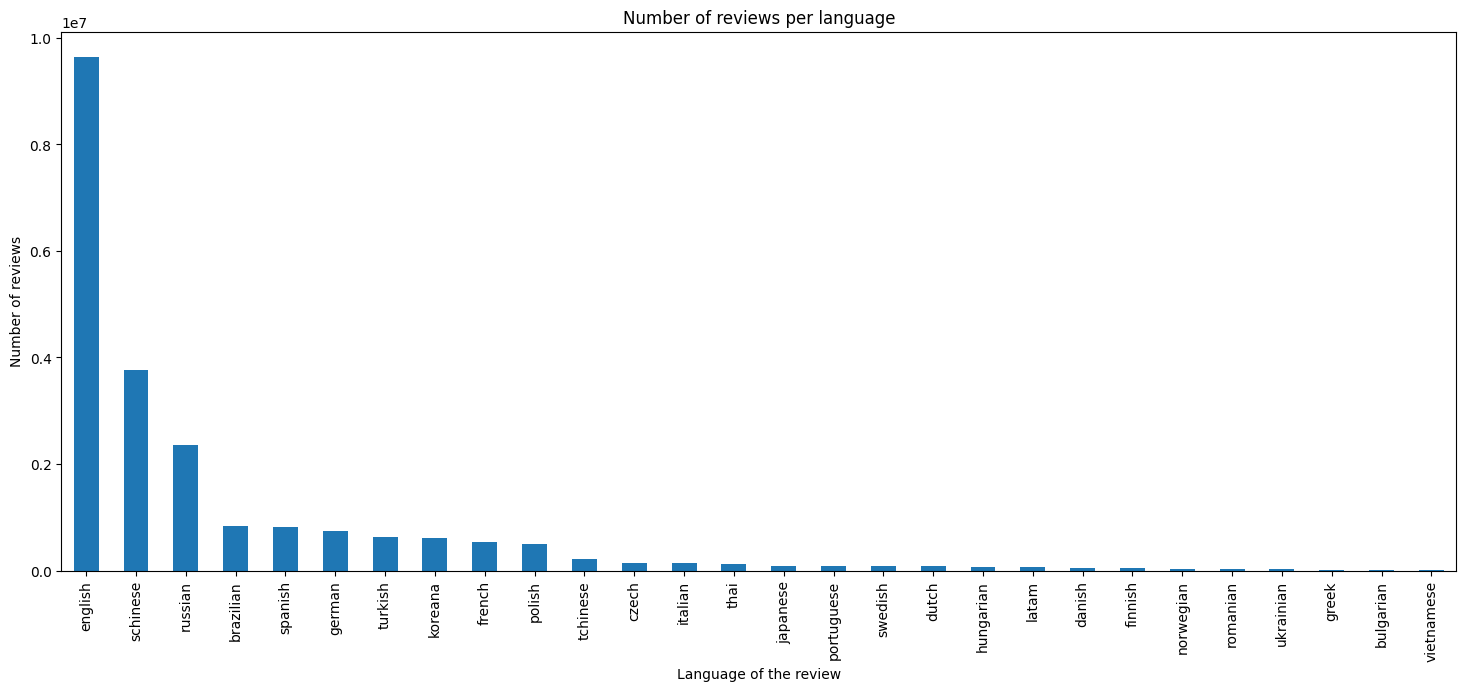

In [11]:
# check the distribution of the languages values
print(df.language.value_counts())
df.language.value_counts().plot.bar(xlabel="Language of the review", ylabel="Number of reviews", title="Number of reviews per language", figsize=(18,7))
print("\n\nMost used languages:")
print(df.language.value_counts().head(5))
print("\nLeast used languages:")
print(df.language.value_counts().tail(5))

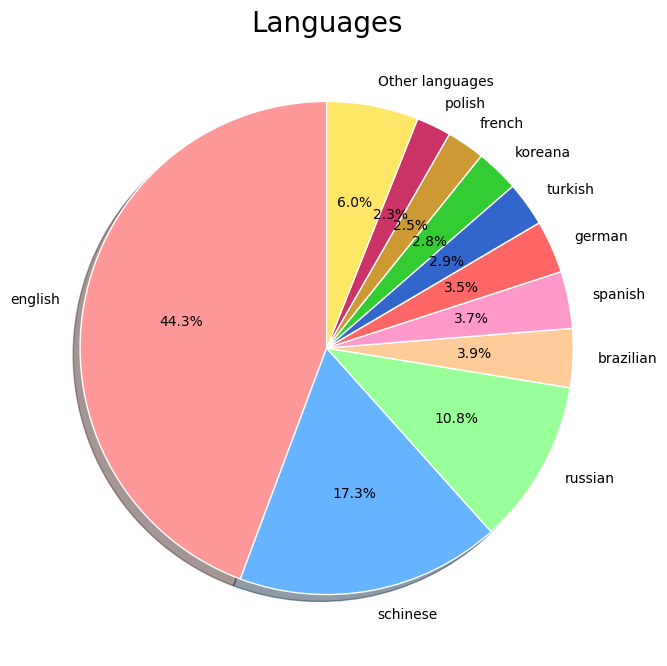

In [12]:
# pie chart to visualize the distribution of values for the 'language' attribute
plt.figure(figsize=(7, 8))
data = df.language.value_counts()
labels = df.language.unique()
counts_less_than_something = data < 300000 # the languages with less than 300000 entries will be collapsed in "Other languages"
new_data = data[~counts_less_than_something]
new_data["Other languages"] = data[counts_less_than_something].sum()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#ff6666', '#3366cc', '#33cc33', '#cc9933', '#cc3366', '#ffe666', '#006633', '#003333']


plt.pie(new_data,
        labels=new_data.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        wedgeprops={'edgecolor': 'white'},
        shadow = True)
plt.title("Languages", fontsize=20)
plt.axis('equal')
plt.show()

In [13]:
# quick overview of the dataset by the languages
for language, el in df.groupby("language"):
    if language in new_data:
        sys.stdout.write('\x1b[103m')
        sys.stdout.write(language)
        sys.stdout.write('\x1b[0m')
        sys.stdout.write('\n')
        print(el.describe())
        print()

brazilian
             app_id     review_id              timestamp_created  \
count  8.375240e+05  8.375240e+05                         837524   
mean   3.619817e+05  5.297576e+07  2019-01-16 04:04:34.188601856   
min    7.000000e+01  1.688700e+04            2010-11-20 01:51:36   
25%    2.273000e+05  3.738448e+07     2017-11-24 17:47:39.500000   
50%    2.920300e+05  5.498005e+07     2019-09-05 22:00:27.500000   
75%    4.319600e+05  7.086032e+07  2020-06-16 00:05:47.249999872   
max    1.291340e+06  8.521867e+07            2021-01-23 18:24:47   
std    2.324201e+05  2.062297e+07                            NaN   

                   timestamp_updated  votes_helpful   votes_funny  \
count                         837524   8.375240e+05  8.375240e+05   
mean   2019-02-22 14:55:07.743537920   5.251249e+06  9.230744e+04   
min              2010-11-20 01:51:36   0.000000e+00  0.000000e+00   
25%    2017-12-28 13:09:46.249999872   0.000000e+00  0.000000e+00   
50%              2019-11-10 19:0

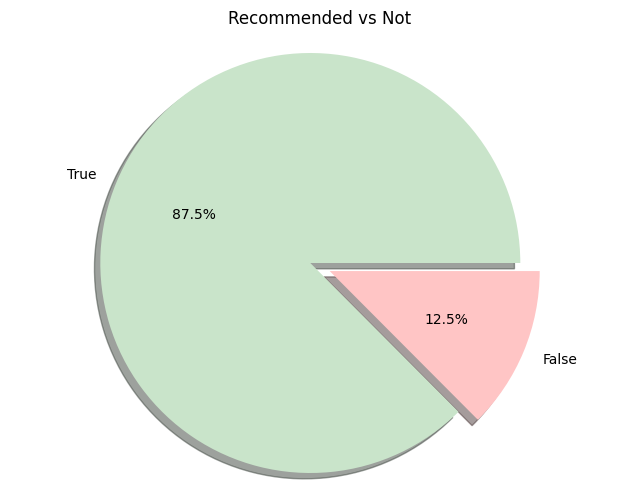

In [14]:
# check how many reviews recommend the game
recommended_counts = df['recommended'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(recommended_counts,
        labels=recommended_counts.index,
        colors = ['#C9E4CA', '#FFC5C5'],
        autopct='%1.1f%%',
        explode = [0,0.1],
        shadow = True)
plt.title('Recommended vs Not')
plt.axis('equal')
plt.show()

steam_purchase
True     16842432
False     4904939
Name: count, dtype: int64


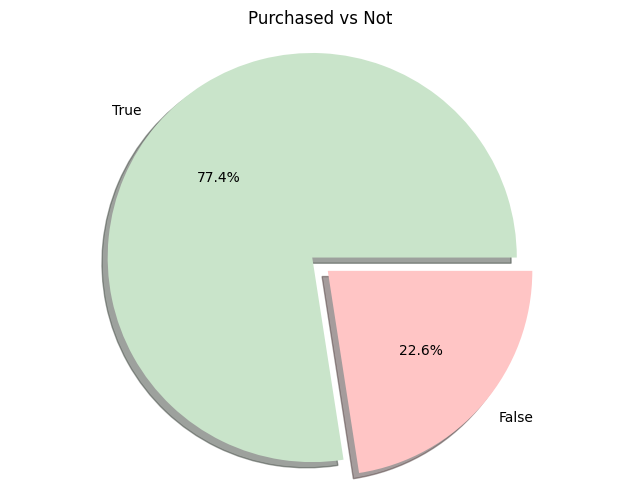

In [15]:
# check how many reviewers purchased the game
steam_purchase_counts = df['steam_purchase'].value_counts()
print(steam_purchase_counts)

plt.figure(figsize=(8, 6))
plt.pie(steam_purchase_counts, 
        labels=steam_purchase_counts.index, 
        colors = ['#C9E4CA', '#FFC5C5'], 
        autopct='%1.1f%%',
        explode = [0,0.1],
        shadow = True)
plt.title('Purchased vs Not')
plt.axis('equal')
plt.show()

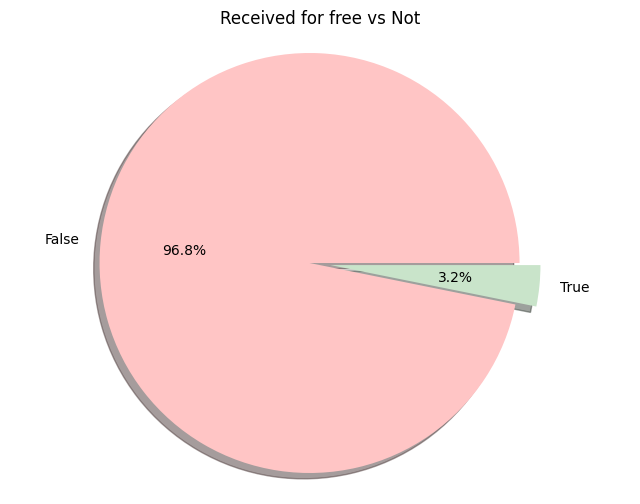

In [16]:
# check how many reviewers received the game for free
received_for_free_counts = df['received_for_free'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(received_for_free_counts,
        labels=received_for_free_counts.index,
        colors = ['#FFC5C5', '#C9E4CA'],
        autopct='%1.1f%%',
        explode = [0,0.1],
        shadow = True)
plt.title('Received for free vs Not')
plt.axis('equal')
plt.show()

# from this we get that some reviewers have a game but did't purchased it on steam or neither get it for free

In [17]:
# print min of timestamp_created
df.timestamp_created.min()

# the oldest review that we have is from the 19th November of 2010

Timestamp('2010-11-19 20:17:16')

In [18]:
# print max of timestamp_created
df["timestamp_created"].max()

# the most recent review that we have is from the 23rd January of 2021

Timestamp('2021-01-23 18:24:47')

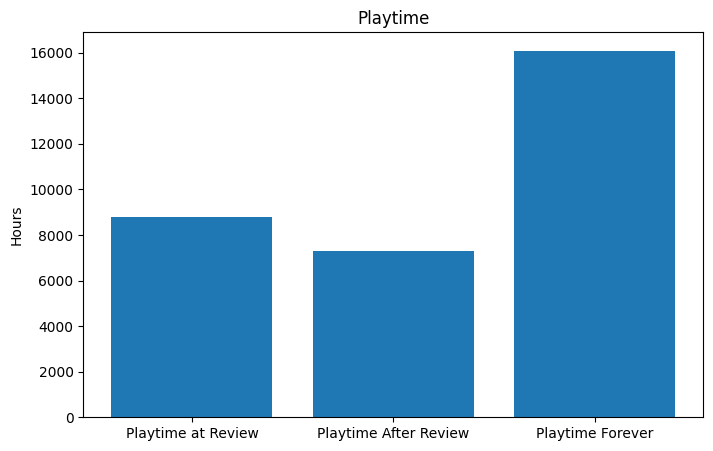

In [19]:
# plot the average time (in minutes, according to the steam developer community) a player spent playing
# the game before reviewing, after reviewing and the total time a player spent on the application
df['playtime_after_review'] = df['author.playtime_forever'] - df['author.playtime_at_review']

plt.figure(figsize=(8, 5))
plt.bar(['Playtime at Review', 'Playtime After Review', 'Playtime Forever'], [df['author.playtime_at_review'].mean(), df['playtime_after_review'].mean(), df['author.playtime_forever'].mean()])
plt.ylabel('Hours')
plt.title('Playtime')
plt.show()

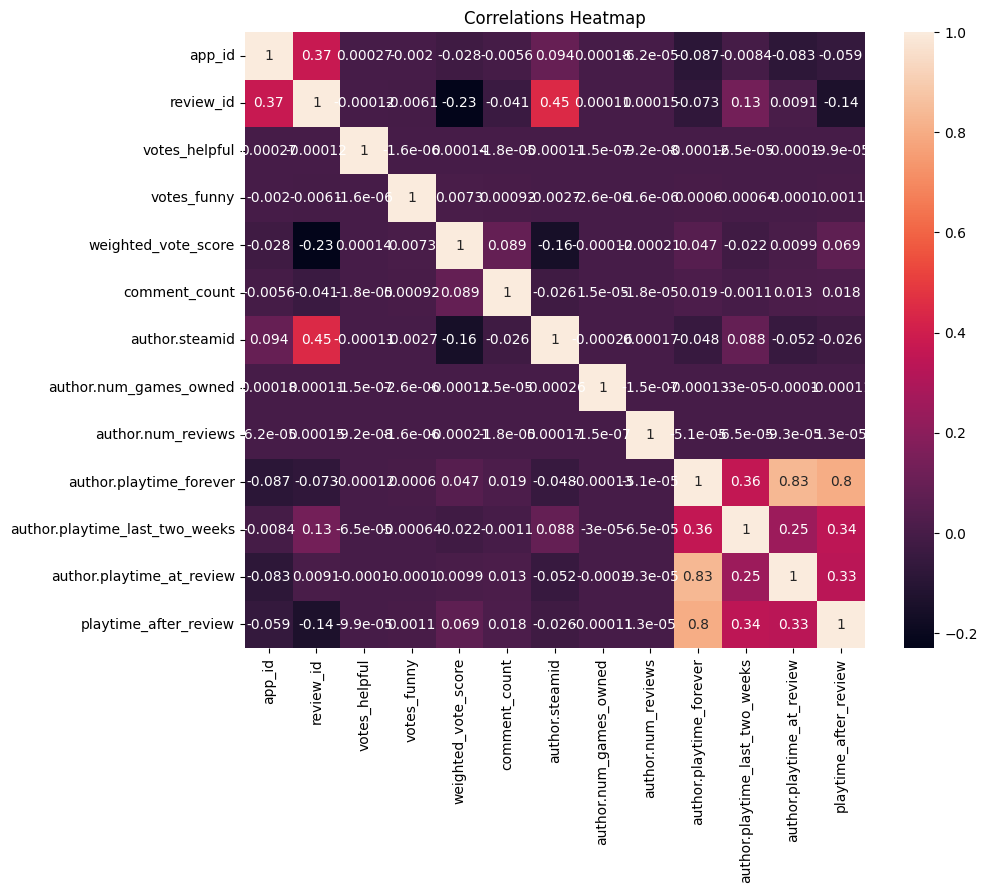

In [20]:
# calculate and show the correlation matrix
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlations Heatmap')
plt.show()

# [RQ2] Let's explore the dataset by analyzing the distribution of reviews across different applications.

### Identify which applications have the highest and lowest number of reviews.

In [21]:
# we drop any missing values
app_review_counts = df.dropna(subset=['comment_count'])

# count the reviews for each game
result = app_review_counts.groupby('app_name')['review_id'].count().reset_index()
result.columns = ['App Name', 'Total Reviews']
result = result.sort_values('Total Reviews', ascending = False)

# to get an idea we display the top 10 applications with the highest number or reviews
# and the bottom 10 applications with the lowest number or reviews
print("Top 10 Applications by number of reviews:")
print(result.head(10))
print("\nBottom 10 Applications by number of reviews:")
print(result.tail(10))

Top 10 Applications by number of reviews:
                           App Name  Total Reviews
182   PLAYERUNKNOWN'S BATTLEGROUNDS        1644255
118              Grand Theft Auto V        1019116
273  Tom Clancy's Rainbow Six Siege         841918
248                        Terraria         672815
114                     Garry's Mod         655524
208                            Rust         549074
205                   Rocket League         498565
180                        PAYDAY 2         487747
9                          Among Us         485293
264        The Witcher 3: Wild Hunt         469395

Bottom 10 Applications by number of reviews:
                            App Name  Total Reviews
23             Battle Royale Trainer           1600
297                         WWE 2K17           1499
36                       Budget Cuts           1298
283                       Toukiden 2           1200
230                       Slipstream           1103
79   Don't Escape: 4 Days to Survive   

### Plot the number of reviews for each application in descending order. What insights can you draw from the plot?

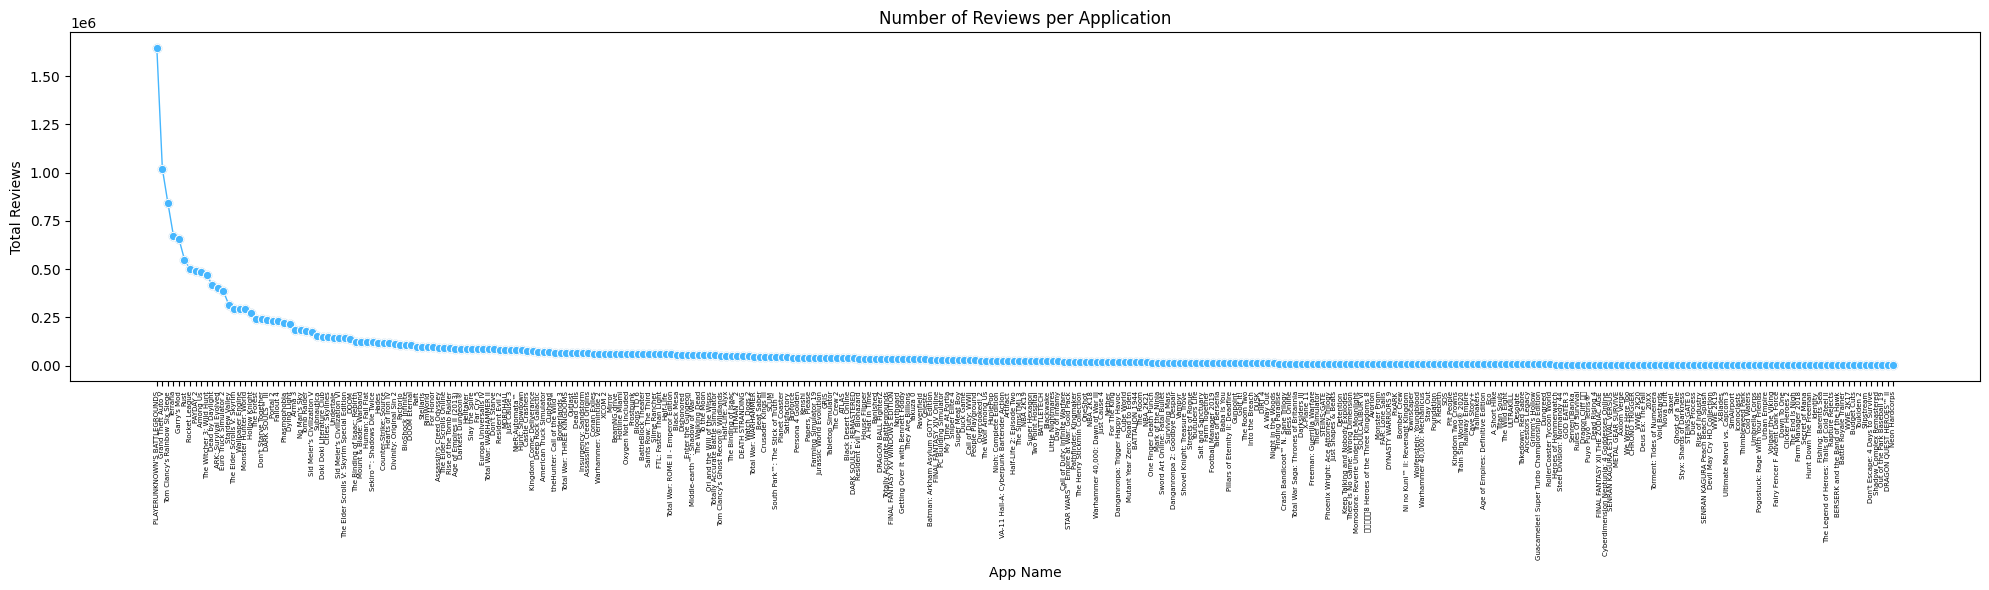

In [22]:
#plot the distribution of number of reviews for all the games in the dataset
plt.figure(figsize=(20, 6))
sns.lineplot(data=result, x='App Name', y='Total Reviews', marker='o', color='#45b6fe', linewidth=1)
sns.scatterplot(data=result, x='App Name', y='Total Reviews', s=50, marker='o',edgecolors='black')
plt.title('Number of Reviews per Application')
plt.xlabel('App Name')
plt.ylabel('Total Reviews')
plt.xticks(rotation=90, fontsize = 5)
plt.tight_layout()

plt.show()

#The plot shows that there are just few games with the highest number of reviews. The
#vast majority has a number of reviews between 200 and 450000. Here the top 10 games:
#1                     PLAYERUNKNOWN'S BATTLEGROUNDS
#2                                Grand Theft Auto V
#3                    Tom Clancy's Rainbow Six Siege
#4                                          Terraria
#5                                       Garry's Mod
#6                                              Rust
#7                                     Rocket League
#8                                          PAYDAY 2
#9                                          Among Us
#10                         The Witcher 3: Wild Hunt

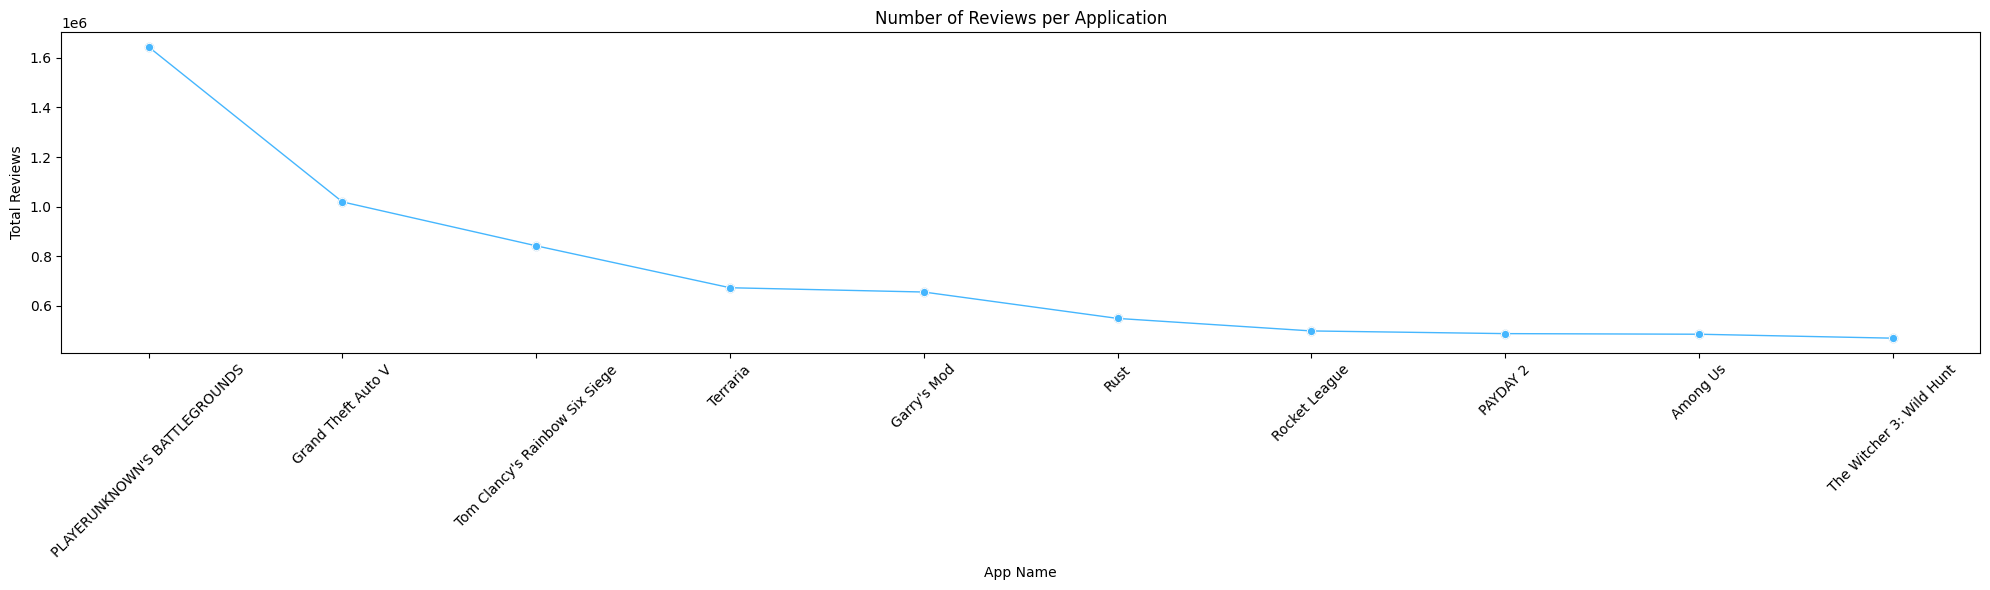

In [23]:
#plot the top 10 games with highest number of reviews
top_10_result = result.iloc[:10]

plt.figure(figsize=(20, 6))
sns.lineplot(data=top_10_result, x='App Name', y='Total Reviews', marker='o', color='#45b6fe', linewidth=1)
sns.scatterplot(data=top_10_result, x='App Name', y='Total Reviews', s=50, marker='o',edgecolors='black')
plt.title('Number of Reviews per Application')
plt.xlabel('App Name')
plt.ylabel('Total Reviews')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

### For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.

In [24]:
# we get the top 5 reviewed games
top5_result = result.head(5)
print(top5_result)


# calculate the percentages for each game from the top 5 reviewed games
purchase_status_percentages = pd.DataFrame()
filtered_df = df[df['app_name'].isin(top5_result['App Name'])]
print(" ")
purchase_status_counts = filtered_df.groupby(['app_name', 'steam_purchase'])['review_id'].count().unstack()
purchase_status_counts.columns = ['Not purchased', 'Purchased']
print(purchase_status_counts)
purchase_status_percentages["Purchased"] = (purchase_status_counts["Purchased"] / (purchase_status_counts["Purchased"] + purchase_status_counts["Not purchased"])) * 100
purchase_status_percentages["Not Purchased"] = 100 - purchase_status_percentages["Purchased"]
print(" ")
print("Percentages: ")
print(purchase_status_percentages)


#We get the following percentages from the top 5 reviewed games. It's easy to notice that
#the majority of the authors purchased the game.

#Percentages:                    Purchased  Not Purchased
#app_name
#PLAYERUNKNOWN'S BATTLEGROUNDS   83.485895      16.514105
#Grand Theft Auto V              88.830712      11.169288
#Tom Clancy's Rainbow Six Siege  83.441024      16.558976
#Terraria                        78.440879      21.559121
#Garry's Mod                     84.093031      15.906969

                           App Name  Total Reviews
182   PLAYERUNKNOWN'S BATTLEGROUNDS        1644255
118              Grand Theft Auto V        1019116
273  Tom Clancy's Rainbow Six Siege         841918
248                        Terraria         672815
114                     Garry's Mod         655524
 
                                Not purchased  Purchased
app_name                                                
Garry's Mod                            104274     551250
Grand Theft Auto V                     113828     905288
PLAYERUNKNOWN'S BATTLEGROUNDS          271534    1372721
Terraria                               145053     527762
Tom Clancy's Rainbow Six Siege         139413     702505
 
Percentages: 
                                Purchased  Not Purchased
app_name                                                
Garry's Mod                     84.093031      15.906969
Grand Theft Auto V              88.830712      11.169288
PLAYERUNKNOWN'S BATTLEGROUNDS   83.485895      16

### Which applications have the most and the least user recommendations? Summarize your findings.

Top 10 Applications by Number of recommendations:
                           App Name  N. recommendations
182   PLAYERUNKNOWN'S BATTLEGROUNDS             1644255
118              Grand Theft Auto V             1019116
273  Tom Clancy's Rainbow Six Siege              841918
248                        Terraria              672815
114                     Garry's Mod              655524
208                            Rust              549074
205                   Rocket League              498565
180                        PAYDAY 2              487747
9                          Among Us              485293
264        The Witcher 3: Wild Hunt              469395

Bottom 10 Applications by Number of recommendations:
                            App Name  N. recommendations
23             Battle Royale Trainer                1600
297                         WWE 2K17                1499
36                       Budget Cuts                1298
283                       Toukiden 2                

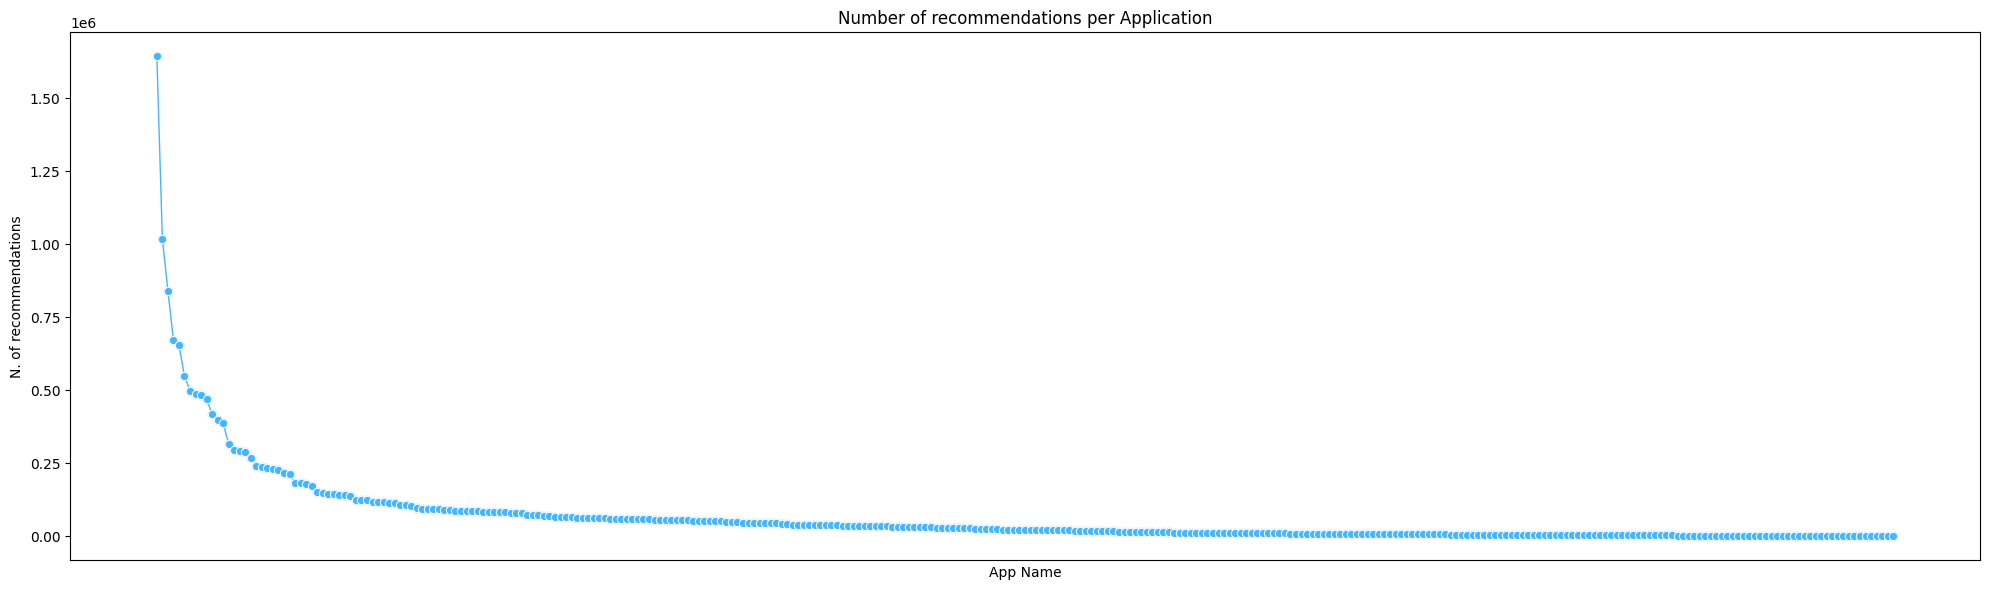

In [4]:
app_recommended_counts = df.dropna(subset=['recommended'])
result2 = app_recommended_counts.groupby('app_name')['recommended'].count().reset_index()
result2.columns = ['App Name', 'N. recommendations']
result2 = result2.sort_values('N. recommendations', ascending=False)

# Display the top 10 applications with the highest number or recommendations
print("Top 10 Applications by Number of recommendations:")
print(result2.head(10))

# Display the bottom 10 applications with the lowest number or recommendations
print("\nBottom 10 Applications by Number of recommendations:")
print(result2.tail(10))

plt.figure(figsize=(20, 6))
sns.lineplot(data=result2, x='App Name', y='N. recommendations', marker='o', color='#45b6fe', linewidth=1)
sns.scatterplot(data=result2, x='App Name', y='N. recommendations', s=50, marker='o',edgecolors='black')
plt.title('Number of recommendations per Application')
plt.xlabel('App Name')
plt.ylabel('N. of recommendations')
plt.xticks([])
plt.tight_layout()

plt.show()

# The plot below it's pretty similar to the plot above about the n. of reviews per game 
# because of the great number of recommendations

### Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.

Top 10 Applications by Number of Reviews:
                             app_name  N. recommendations
0                                20XX                3605
1                       A Hat in Time               34972
2                        A Short Hike                5847
3                           A Way Out               10941
4               ARK: Survival Evolved              399108
5                               ATLAS               37167
6            Age of Empires II (2013)               86286
7  Age of Empires: Definitive Edition                5963
8            American Truck Simulator               71078
9                            Among Us              485293
Pearson correlation: 0.3555341958167153, p-value: 8.108722239686714e-11
Spearman correlation: 0.5493850468943957, p-value: 3.0997540527178124e-26


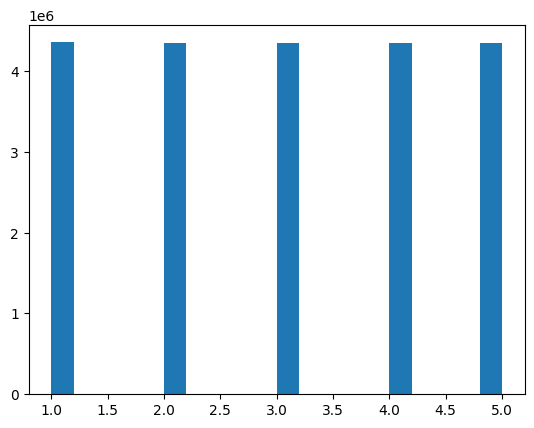

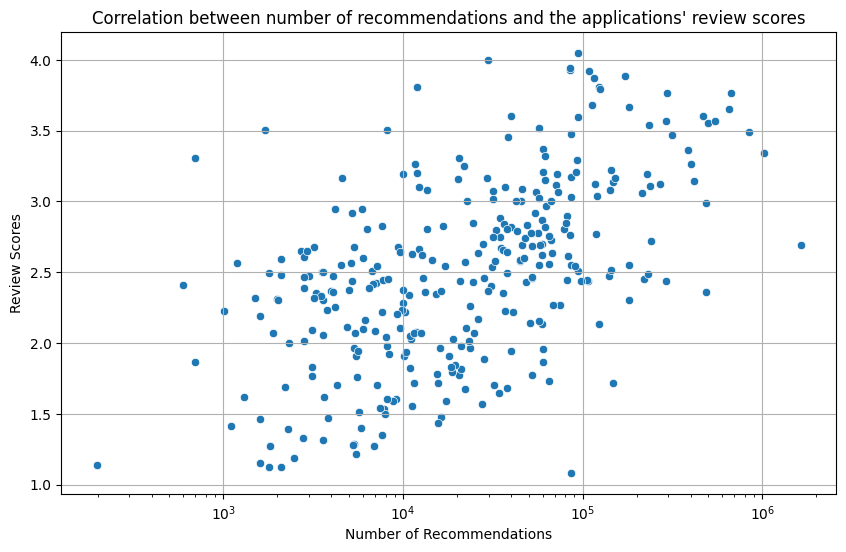

In [6]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy.stats import pearsonr, spearmanr
import numpy as np

corr_df = df[['app_name','review_id', 'author.playtime_at_review', 'author.playtime_forever', 'recommended']].dropna()
corr_df['transformed_playtime'] = np.log10(corr_df['author.playtime_at_review'] + 1)

# we don't have an actual game score, so we compute by weighting the transformed
# playtime and the it this way:
corr_df['raw'] = 0.3 * corr_df['transformed_playtime'] + 0.7 * corr_df['recommended']

scaler_robust = RobustScaler()
corr_df['scaled'] = scaler_robust.fit_transform(corr_df[['raw']])

# rescale the score from 0 to 5 (cause a game in Steam can get 5 general scores:
# extremely positive, positive, neutral, negative, extremely negative)
scaler_minmax = MinMaxScaler(feature_range=(0, 5))
corr_df['raw_score'] = scaler_minmax.fit_transform(corr_df[['scaled']])
corr_df['score'] = pd.qcut(corr_df['raw_score'], q=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[1, 2, 3, 4, 5], precision=0)
corr_df['score'] = corr_df['score'].astype(int)
plt.hist(data=corr_df, x='score', bins=20)
#plt.show()

# get the score mean for each name
mean_score_df = corr_df.groupby('app_name')['score'].mean().reset_index()
mean_score_df.columns = ['app_name', 'mean_score']

# get the number of recommendations for each name
n_reccom_df = corr_df.groupby('app_name')['recommended'].count().reset_index()
n_reccom_df.columns = ['app_name', 'N. recommendations']

# display the top 10 applications with the highest number or reviews
print("Top 10 Applications by Number of Reviews:")
print(n_reccom_df.head(10))

results = pd.merge(n_reccom_df, mean_score_df, on='app_name', how='inner')

# compute Pearson correlation
pearson_corr, pearson_p_value = pearsonr(results['N. recommendations'], results['mean_score'])
print(f'Pearson correlation: {pearson_corr}, p-value: {pearson_p_value}')

# compute Spearman correlation
spearman_corr, spearman_p_value = spearmanr(results['N. recommendations'], results['mean_score'])
print(f'Spearman correlation: {spearman_corr}, p-value: {spearman_p_value}')

# plot the Correlation between the number of recommendation and the review scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results, x='N. recommendations', y='mean_score')
plt.title('Correlation between number of recommendations and the applications\' review scores')
plt.xscale("log")
plt.xlabel('Number of Recommendations')
plt.ylabel('Review Scores')
plt.grid()
plt.show()

# [RQ3] Understanding when users are most active in submitting reviews can help identify peak engagement periods.



### Plot the number of reviews submitted each month and describe any trends.



There is a noticeable increase in the number of reviews over the years, with significant spikes primarily observed in November. This could be associated with the sales (ex. Black Friday) and the holiday season.
Beginning in late 2019, there has been a notable and steady rise in the volume of reviews, which stays elevated throughout 2020 and into the beginning of 2021. This was during the covid-19 epidemy, so that might explain the higher number of reviews.

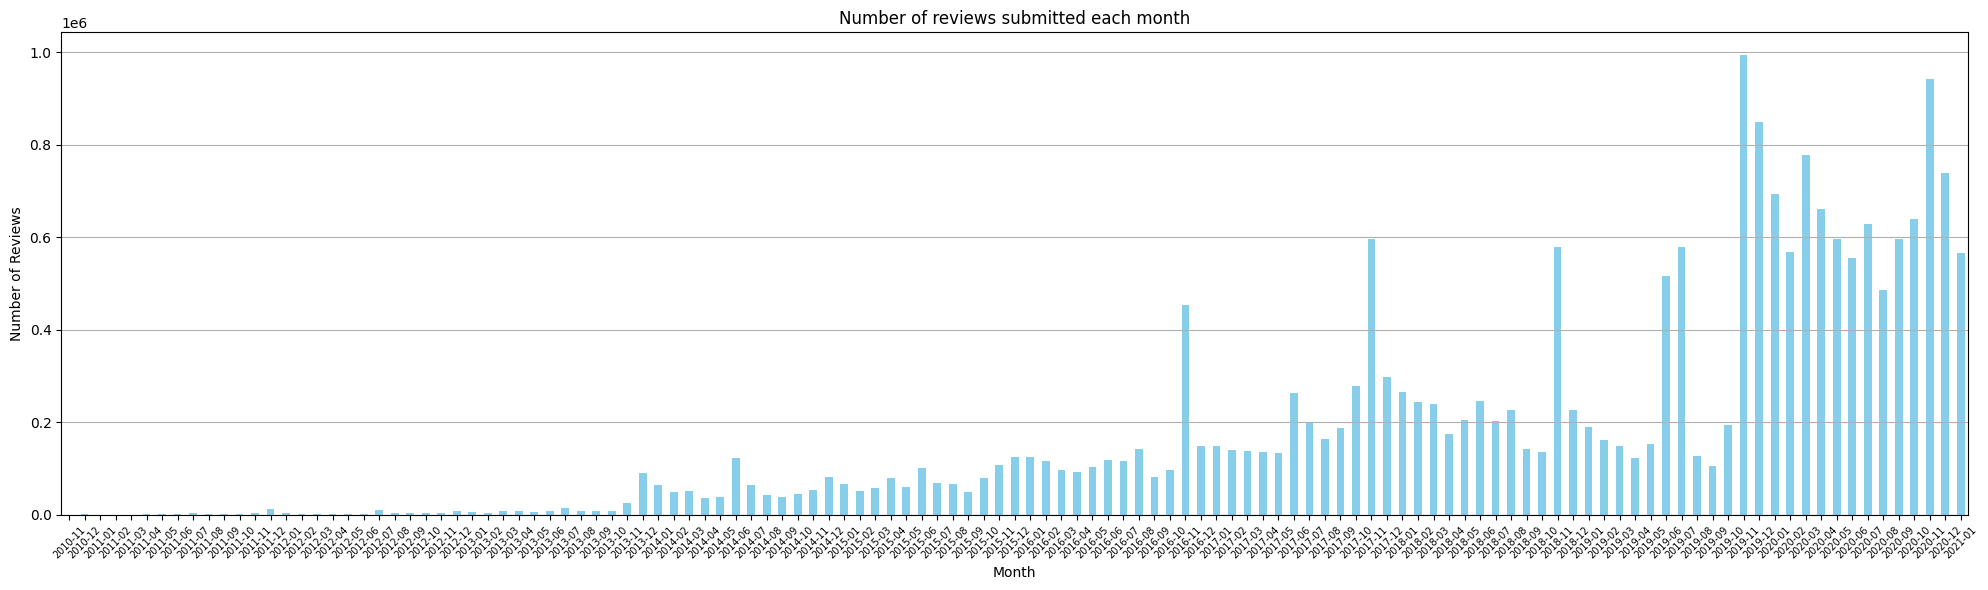

In [7]:
# extract year and month
df['year_month'] = df['timestamp_created'].dt.to_period('M')
monthly_reviews = df.groupby('year_month').size()

# plot the number of reviews submitted each month
plt.figure(figsize=(20, 6))
monthly_reviews.plot(kind='bar', color='skyblue')
plt.title('Number of reviews submitted each month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, fontsize=7)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.

It' easy to notice from the plot above that each year there is a peak in the number of user reviews in November. In general there is a high number of review during all the winter season. Then, with the end of the holiday season we notice a drop in March/April. After that there is a small increase in June/July and then another dicreasing phase till november.

### Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.


From the plot below we notice that generally speaking we have an highest number of reviews in the winter season, with November being the month with the highest number of reviews.

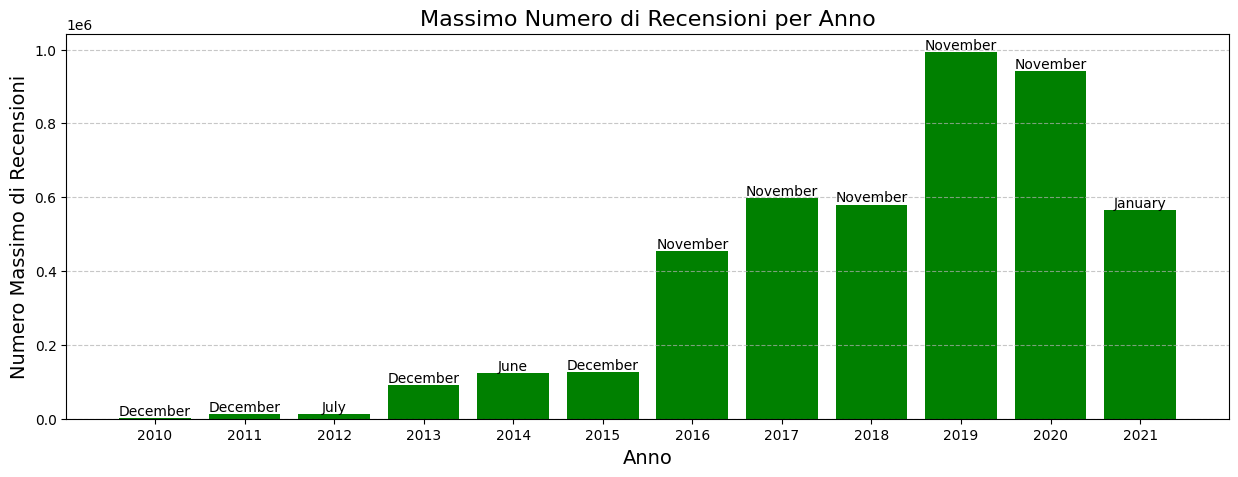

In [9]:
results = []

monthly_reviews = df.groupby('year_month').size()
for year in monthly_reviews.index.year.unique():
    yearly_data = monthly_reviews[monthly_reviews.index.year == year]
    results.append({
        'Year': year,
        'Month': yearly_data.idxmax().strftime("%B"),  # Nome del mese
        'Max Reviews': yearly_data[yearly_data.idxmax()]
    })
    
max_reviews_per_year = pd.DataFrame(results)
plt.figure(figsize=(15, 5))
for index, row in max_reviews_per_year.iterrows():
    plt.annotate(row['Month'],
                 (str(row['Year']), row['Max Reviews']),
                 ha='center',
                 va='bottom',
                 fontsize=10)
plt.bar(max_reviews_per_year['Year'].astype(str), max_reviews_per_year['Max Reviews'], color='green')
plt.title('Massimo Numero di Recensioni per Anno', fontsize=16)
plt.xlabel('Anno', fontsize=14)
plt.ylabel('Numero Massimo di Recensioni', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### What is the most common time of day users write reviews? For example, users might typically write reviews at 17:44. Explain how this time distribution could influence your analysis.


Conversione dei timestamp: 100%|██████████| 21747371/21747371 [02:22<00:00, 152926.47it/s]


L'orario più comune per scrivere recensioni è 14:50 con 19502 recensioni.


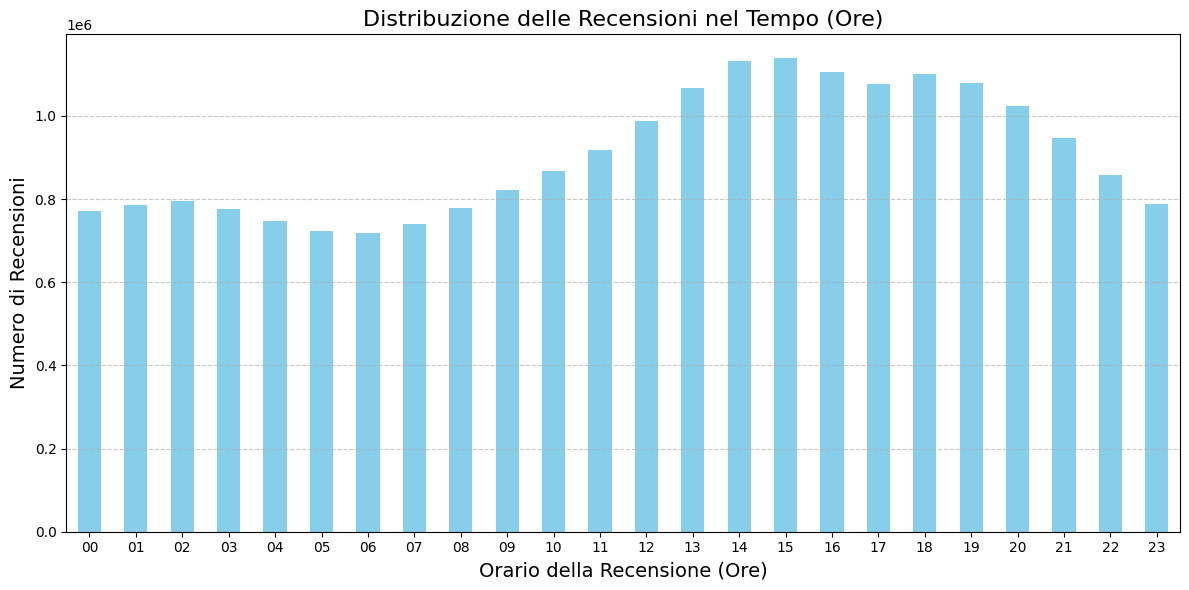

In [11]:
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

# Assume that df_sample is the DataFrame containing the review data
# Convert the timestamp_created column to datetime format with tqdm to monitor the process
tqdm.pandas(desc="Converting timestamps")
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s')

# Extract review time in hour:minute format and hour-only format for analysis
df['review_time'] = df['timestamp_created'].progress_apply(lambda x: x.strftime('%H:%M'))
df['review_hour'] = df['timestamp_created'].progress_apply(lambda x: x.strftime('%H'))

# Calculate the distribution of reviews for each time (hour and minute) to find the most common review time
time_distribution = df['review_time'].value_counts()
most_common_time = time_distribution.idxmax()
most_common_count = time_distribution.max()

print(f"The most common time for writing reviews is {most_common_time} with {most_common_count} reviews.")

# Calculate the distribution of reviews for each hour (hour only)
hour_distribution = df['review_hour'].value_counts().sort_index()

# Create a bar chart of the review distribution over time (hours only)
plt.figure(figsize=(12, 6))
hour_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Reviews Over Time (Hours)', fontsize=16)
plt.xlabel('Review Time (Hours)', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Create a function that accepts a list of time intervals and plots the number of reviews for each interval.


In [14]:
df['time_of_day'] = df['timestamp_created'].dt.time

print(df['time_of_day'])

def plot_unique_authors_by_time_interval(df, time_intervals):
    results = []
    # Count unique authors for each time interval
    for start, end in time_intervals:
        # Create a filter for the current time interval
        mask = (df['time_of_day'] >= pd.to_datetime(start).time()) &  (df['time_of_day'] <= pd.to_datetime(end).time())

        # Count unique authors in this interval
        unique_authors_count = df.loc[mask, 'author.steamid'].nunique()
        results.append(unique_authors_count)

    # Create a DataFrame for plotting
    interval_labels = [f"{start} to {end}" for start, end in time_intervals]
    df = pd.DataFrame({'Time Interval': interval_labels, 'Unique Authors': results})

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(df['Time Interval'], df['Unique Authors'], color='skyblue')
    plt.xlabel('Time Intervals')
    plt.ylabel('Number of Unique Authors')
    plt.title('Number of Unique Authors by Time Interval')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

0           06:00:29
1           05:50:30
2           05:46:40
3           05:32:50
4           05:23:47
              ...   
21747371    18:05:04
21747372    18:04:53
21747373    18:04:33
21747374    18:03:51
21747375    18:01:45
Name: time_of_day, Length: 21747371, dtype: object


### Use the function to plot the number of reviews for the following time intervals:
Initial Time Final Time

00:00:00 02:59:59

03:00:00 05:59:59

06:00:00 10:59:59

11:00:00 13:59:59

14:00:00 16:59:59

17:00:00 19:59:59

20:00:00 23:59:59

### Summarize your findings from the time interval analysis

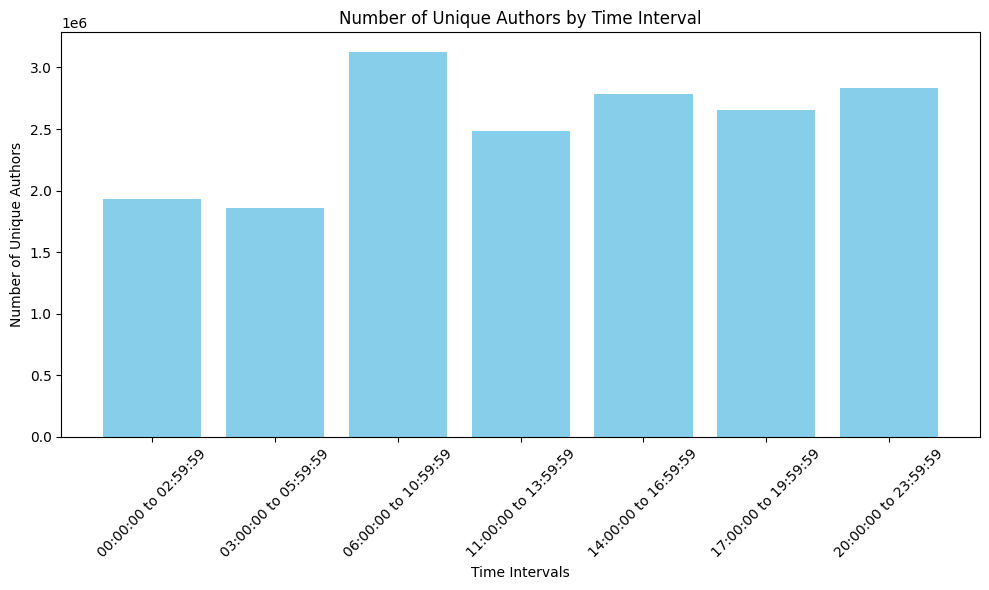

In [15]:
time_intervals = [
    ('00:00:00', '02:59:59'),
    ('03:00:00', '05:59:59'),
    ('06:00:00', '10:59:59'),
    ('11:00:00', '13:59:59'),
    ('14:00:00', '16:59:59'),
    ('17:00:00', '19:59:59'),
    ('20:00:00', '23:59:59')
]
plot_unique_authors_by_time_interval(df, time_intervals)

# [RQ4] Investigating whether users who spend more time using an application give higher or lower ratings.

### Analyze the relationship between the amount of time a user has spent on an application and their review score.

In [7]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

es4 = df[['author.playtime_at_review', 'author.playtime_forever', 'author.steamid', 'recommended']].dropna()
print(f"The rows that are dropped from the dataset are", len(df)-len(es4))
# The dataset to use for Exercise 4 consists of only three columns: 'author.playtime_at_review', 'author.playtime_forever', and 'recommended'.
# Null values are removed from these columns. As we can see, there are slightly over 25,000 null instances, which is negligible compared
# to the dataset’s total of 21 million rows.
# To redefine a score for each review of each game, we select the columns "recommended" and "author.playtime_at_review".
# The recommendation status of a game is the only tangible measure of whether the game is appreciated or not, while the playtime
# at the time of review provides additional insight into how much the user has played that specific game.
# This, in turn, allows us to gauge the extent to which the user enjoyed the game.

# # To reduce the impact that outliers may have on the final score, we apply a logarithmic transformation.
# Specifically, we take the log base 10 of playtime + 1. This addition of 1 prevents users who haven’t played the game at all before leaving a review
# from having a score of negative infinity, which would distort the entire rescaling.

es4['transformed_playtime'] = np.log10(es4['author.playtime_at_review'] + 1)

# Then, weights are applied, assigning 30% of the weight to playtime and 70% to the game recommendation.
es4['raw'] = 0.3 * es4['transformed_playtime'] + 0.7 * es4['recommended']

# After calculating a "raw" score, we can apply the robust scaler transformation,
# which is a data preprocessing technique used to handle outliers by scaling features based on their median and interquartile range (IQR).
scaler_robust = RobustScaler()
es4['scaled'] = scaler_robust.fit_transform(es4[['raw']])

# The penultimate step is to scale the scores between 0 and 5.
scaler_minmax = MinMaxScaler(feature_range=(0, 5))
es4['raw_score'] = scaler_minmax.fit_transform(es4[['scaled']])

print(es4[['author.playtime_at_review', 'recommended', 'raw', 'raw_score']].head())

The rows that are dropped from the dataset are 25684
   author.playtime_at_review  recommended       raw  raw_score
0                     1909.0         True  1.684310   3.110397
1                     2674.0         True  1.728197   3.196035
2                     1060.0         True  1.607715   2.960936
3                     5524.0         True  1.822700   3.380439
4                      217.0         True  1.401537   2.558618


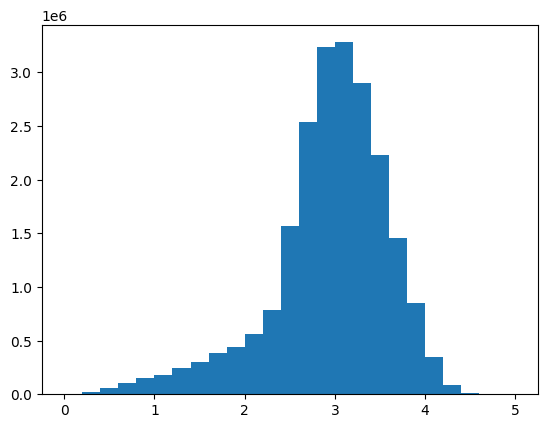

In [8]:
plt.hist(data=es4, x="raw_score", bins=25)
plt.show()

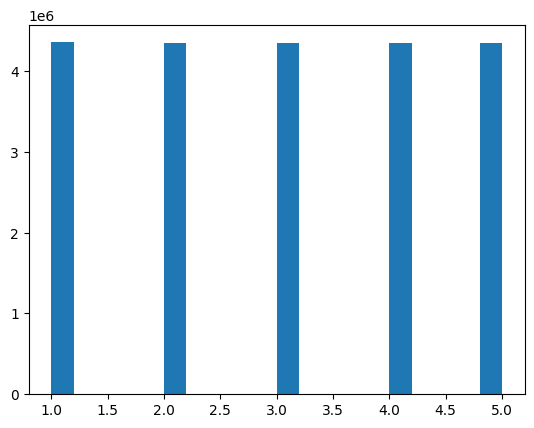

In [9]:
es4['raw_score'].describe()
# From the histogram and the table, it is possible to observe a trend where the scores tend to follow a normal distribution,
# with many values between 2.5 and 3.5, few values below 2, and even fewer values above 4.
# To address this issue, which could create confusion when recognizing patterns in subsequent analyses, we have decided to categorize the values.
# We assign a score of 1 to values in the 20th percentile, 2 to scores that fall between the 20th and 40th percentiles,
# 3 to scores between the 40th and 60th percentiles, 4 to those between the 60th and 80th percentiles, and 5 to the remainder.
es4['score'] = pd.qcut(es4['raw_score'], q=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[1, 2, 3, 4, 5], precision=0)
es4['score'] = es4['score'].astype(int)
plt.hist(data=es4, x='score', bins=20)
plt.show()

In [10]:
es4['score'].describe()

count    2.172169e+07
mean     2.999550e+00
std      1.414594e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: score, dtype: float64

In this way, it is possible to distinctly separate the review values from one another and conduct more comprehensive analyses in the subsequent exercises.

### Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.

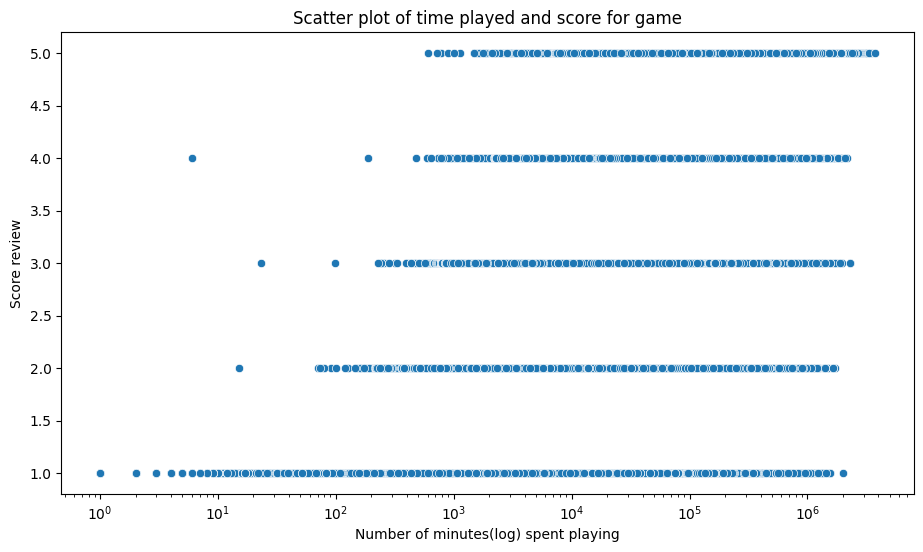

In [11]:
# The best tool for understanding the relationship between the time spent by a user on a game and their score is correlation,
# followed by an ANOVA test to assess its statistical significance.
# Therefore, the first step is to calculate the Pearson correlation coefficient after reviewing the scatterplot of the two variables.
from scipy.stats import pearsonr

plt.figure(figsize=(11, 6))
sns.scatterplot(data=es4, x='author.playtime_forever', y='score')
plt.xscale('log')
plt.title("Scatter plot of time played and score for game")
plt.xlabel("Number of minutes(log) spent playing")
plt.ylabel("Score review")
plt.show()

From the scatterplot, it is possible to see that in all score classes there are players who have played certain games for a long time. However, as the review score increases, the tendency for playtime to be low decreases. While for a score of 1, the playtime varies from a few minutes to values exceeding 10^6, for reviews with a score of 5, the minimum playtime is around 1000 minutes.

In [12]:
corr, p_value = pearsonr(es4['author.playtime_forever'], es4['score'])
print(corr, p_value)

0.31888248004669917 0.0


The p-value associated with the correlation coefficient (0.0) indicates that the coefficient is statistically significant. The value of the correlation coefficient is approximately 0.32, confirming a moderate positive correlation between the number of minutes a user spends on a game and the estimated review score. To further analyze these values, an ANOVA model can be constructed, based on the variance analysis of the model itself, to understand if there is a significant variability in the score depending on the playtime.

In [13]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

es4['time_group'] = pd.qcut(es4['author.playtime_forever'], q=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                             labels = ['Very low', 'Low', 'Normal', 'High', 'Very high'], precision=0)
# To construct an ANOVA model, it is necessary to convert the playtime variable into different classes in order to analyze the interclass differences.
fit1 = ols('score ~ C(time_group)', data=es4).fit()
anova_table = sm.stats.anova_lm(fit1, typ=2)

print(anova_table)

                     sum_sq          df             F  PR(>F)
C(time_group)  1.789139e+07         4.0  3.798879e+06     0.0
Residual       2.557537e+07  21721682.0           NaN     NaN


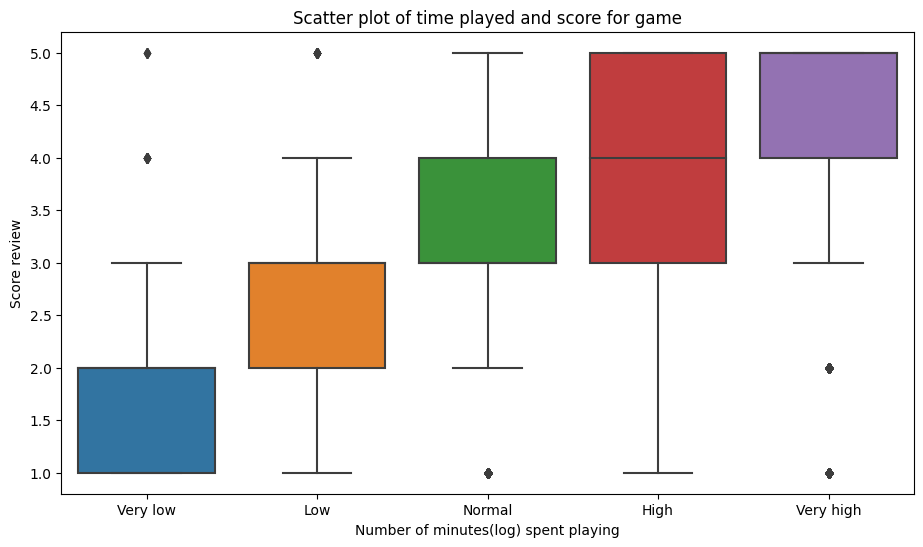

In [14]:
#boxplot on time groups and score level
plt.figure(figsize=(11, 6))
sns.boxplot(data=es4, x='time_group', y='score')
#plt.xscale('log')
plt.title("Scatter plot of time played and score for game")
plt.xlabel("Number of minutes(log) spent playing")
plt.ylabel("Score review")
plt.show()

The F-test from the ANOVA model yielded a result of 0. This indicates that the time spent on the app has a significant impact on review scores. This suggests that at least one of the time groups differs statistically significantly from the others in terms of average score.

### Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.

In [15]:
meanscore = es4.groupby('author.steamid')['score'].mean().reset_index()
print(meanscore.head())
meanscore.columns=["steamid", "meanscore"]
#this is the table for the average score per user

      author.steamid  score
0  76561197960265730    2.0
1  76561197960265745    3.5
2  76561197960265747    3.0
3  76561197960265778    3.5
4  76561197960265781    2.0


In [16]:
playforeverallgames = es4.groupby('author.steamid')['author.playtime_forever'].sum().reset_index()
print(playforeverallgames.head())
playforeverallgames.columns=["steamid", "playforeverallgames"]
#dataframe with total time played by player

      author.steamid  author.playtime_forever
0  76561197960265730                    407.0
1  76561197960265745                  14075.0
2  76561197960265747                   1842.0
3  76561197960265778                 100205.0
4  76561197960265781                  17057.0


In [17]:
es43 = pd.merge(meanscore, playforeverallgames, on='steamid', how='inner')
print(es43.head())
#data = es43.drop(es43['playforeverallgames'].idxmax())
#merge of the two datasets by 'steamid' as a key

             steamid  meanscore  playforeverallgames
0  76561197960265730        2.0                407.0
1  76561197960265745        3.5              14075.0
2  76561197960265747        3.0               1842.0
3  76561197960265778        3.5             100205.0
4  76561197960265781        2.0              17057.0


In [18]:
es43['binary'] = es43['steamid'].apply(lambda x: bin(x)[2:].zfill(64))
es43['binary'].head()
print(es43['binary'].max())

0000000100010000000000000000000101000101111010101000110111011101


Steam has an ID assignment system that begins with the user’s "universe" (essentially, their region or system category). After this, IDs are assigned sequentially, so the later a Steam account is created, the larger the ID number will be. In this way, if all users belong to the same universe, it’s possible to distinguish between new and veteran users. Since all users have the same first 8 bits in the binary code associated with their ID (those indicating the universe of origin), we can conclude that users can be classified as new or veteran simply by observing their account number.

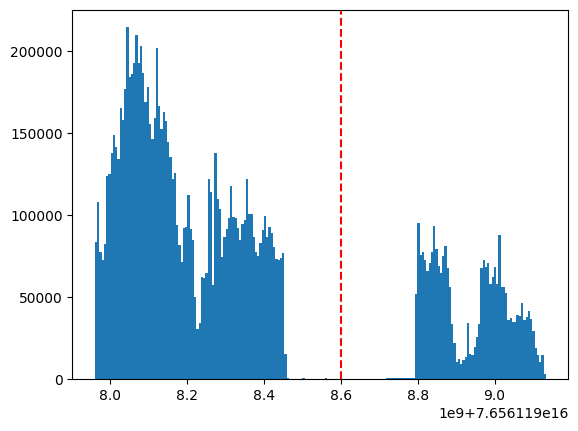

In [19]:
plt.hist(data=es43, x='steamid', bins=200)
plt.axvline(x=76561198600000000, color='red', linestyle='--')
plt.show()

From the histogram of IDs, there is a clear distinction between a distribution of veteran users on the left and new users on the right. The user dataset is therefore divided based on whether users fall in the left or right side of the distribution. The value 76561198600000000 is chosen arbitrarily as the cutoff point to distinguish between veteran and new users.

In [20]:
es43['user'] = es43['steamid'].astype(int) < 76561198600000000
es43['user'].value_counts()

user
True     9673651
False    2723245
Name: count, dtype: int64

<Axes: xlabel='user', ylabel='meanscore'>

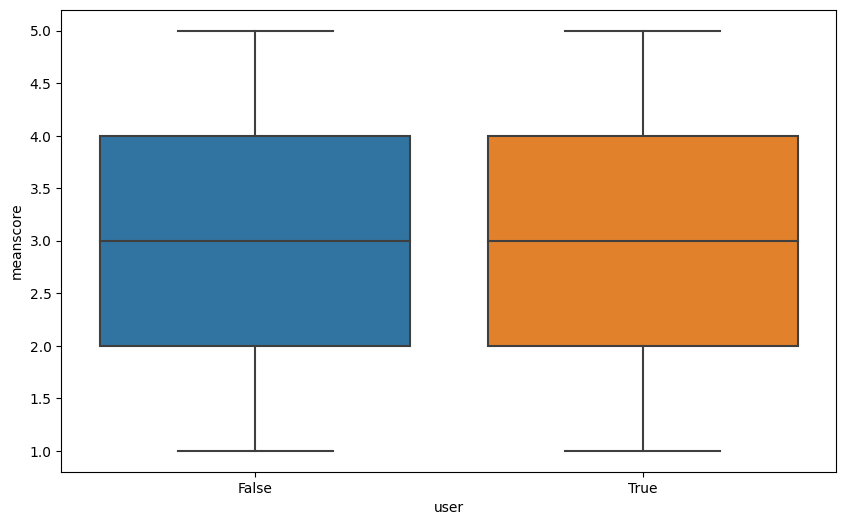

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=es43, x='user', y='meanscore')

#The False values represent new users, while the True values represent veteran users.

The boxplots do not reveal any significant difference between the distributions of average scores for veteran and new users. To investigate further, a hypothesis test can be conducted, where the null hypothesis H_0 states that there is no significant difference between the mean scores of veteran and new users. The alternative hypothesis H_1 suggests the opposite.

In [22]:
print(es43['meanscore'][es43['user'] == True].mean())
print(es43['meanscore'][es43['user'] == False].mean())

3.12502943458423
2.842012695010316


The calculation of the mean returns different values for veteran and new users. Given the contrasting indications between the boxplot and the mean, it is important to proceed with a hypothesis test, using the t-test statistic to determine if the two means are statistically significantly different.

In [23]:
from scipy.stats import ttest_ind

scorevet = es43[es43['user'] == True]['meanscore']
scorenew = es43[es43['user'] == False]['meanscore']
#We divide the scores by veteran and new users, then apply the test statistic to the two distributions.

t_stat, p_value_t = ttest_ind(scorevet, scorenew)
print(t_stat, p_value_t)

alpha = 0.05  # Significativity level

if p_value < alpha:
    print("There is a significant difference between the score distributions (p < 0.05)")
else:
    print("There is not a significant difference between the score distributions (p >= 0.05)")

315.4366845555383 0.0
There is a significant difference between the score distributions (p < 0.05)


From the results of the t-test and the corresponding p-value, it can be concluded that the two distributions have statistically significantly different means. Therefore, veteran users tend to give higher ratings than users who have recently signed up on Steam.

### Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?

The LLM tool just said:

Summary of Statistical Analysis
You conducted a t-test to compare the mean scores between veteran and new users on Steam, obtaining a t-statistic of approximately 315.44 and a p-value of 0.0. These results indicate statistical significance, allowing for the rejection of the null hypothesis that there is no difference between the two means. Consequently, it is observed that veteran users tend to provide higher scores compared to new users.

Possible Explanations for Observed Trends:

1. Experience and Familiarity: Veteran users have interacted more with the platform and games, leading them to formulate more favorable evaluations.

2. Different Expectations: New users may have high expectations that are not always met, negatively influencing their scores.

3. Evolution of Preferences: User tastes may change over time, with veterans tending to positively rate games they have had favorable experiences with.

4. Community Influence: Veterans may be more influenced by community reviews, leading them to higher ratings.

5. Evaluation Criteria: Veteran users may develop stricter evaluation criteria, while new users might be more critical or lenient in their ratings.

Additional Factors to Consider
* Game Interaction: The time spent on various games and the total number of games played may influence ratings.

* User Demographics: Factors such as age, geographic location, and previous gaming experience could impact ratings.

* Types of Games Played: Differences in the genres of games rated by the two groups could be significant.

* Timing of Ratings: Analyzing when scores are given could be useful, for example, assessing whether users rate immediately after playing or after a period of reflection.


**Conclusions**:
The statistical analysis reveals that there is a significant difference in mean scores between veteran and new users on Steam. Veteran users tend to provide higher ratings, suggesting that their experience and familiarity with the platform positively influence their perception of quality. The explanations offered and the factors considered provide a foundation for further investigation, which could help in better understanding user behaviors and enhancing the overall experience on Steam.


To validate the interpretations, two of the possibilities are:

* ANOVA Analysis: Conduct further tests as ANOVA or regression to explore relationships between variables. That could be useful especially when we have more than 2 groups of users and you want to analyze the differences between their scores and the variability between their scores.

* Longitudinal Study: Monitor scores over time to observe any changes in trends. We could, for example, create a variable that divide the year in many sections, and for each section analize the differences between the score of the users, if any category gives a higher or lower rate during a special period, and if so, which games are more likely to receive a bad or a good review by a veteran or a new user.

# [RQ5] It is interesting to explore the top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently.

### Determine the ten reviewers with the highest number of reviews in the dataset.

In [24]:
es5 = df[['author.num_reviews', 'author.steamid', 'language','votes_helpful', 'app_id', 'app_name']].dropna()

In [25]:
#sorted_reviewers = es5.groupby('author.steamid')['author.num_reviews'].max().sort_values(ascending=False)
es5['review_count'] = es5.groupby(['author.steamid']).cumcount() + 1
auth = (es5.groupby('author.steamid')['review_count'].max().reset_index()).sort_values(by='review_count', ascending=False)

#auth = top_authors.sort_values(by='review_count', ascending=False)
top_10_authors = auth.head(10)
print(top_10_authors)


            author.steamid  review_count
2409169  76561198062813911           149
7571900  76561198315585536           132
5773563  76561198192166873           107
6348755  76561198239163744           106
1849199  76561198045381877           103
2478679  76561198064946151           100
960101   76561198013146396            99
1329539  76561198027973295            96
128759   76561197969749884            88
425671   76561197989746995            86


### What is the percentage of each language used by these top 10 reviewers when submitting a review?

In [26]:
#Let's select only the index to isolate the reviews from the top 10 reviewers exclusively
top_10_reviews = es5[es5['author.steamid'].isin(top_10_authors['author.steamid'])]

#We count the language of all comments made by the top 10 reviewers, then convert the counts into percentages
language_distribution = top_10_reviews['language'].value_counts(normalize=True) * 100

print("Percentage of each language used by top 10 reviewers:")
print(language_distribution)

Percentage of each language used by top 10 reviewers:
language
english     53.939962
russian     28.142589
schinese    17.917448
Name: proportion, dtype: float64


### Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.

In [27]:
# Calculate the average number of helpful votes
average_helpful_votes = (top_10_reviews['votes_helpful'].sum() / top_10_authors['review_count'].sum())
# Print the result
print(f"Average helpful votes for top 10 reviewers: {average_helpful_votes} ")

Average helpful votes for top 10 reviewers: 16.553470919324578 


So it means that averagely every review submitted by one the top 10 reviewers has received about 16.5 helpful votes. This number is a lot greater than the average number of helpful votes that every review receives (about 1.9), so we can say that the top 10 reviewers are more reliable than other non-specific reviewers.

In [28]:
votes = es5['votes_helpful'].sort_values(ascending=False)[2:] #dropping the first two values because they are incredible outliers
#votes.head()
sum(votes)/len(es5)
#That's the average number of helpful votes that a review receives (1.9)

1.8959285239581374

### Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

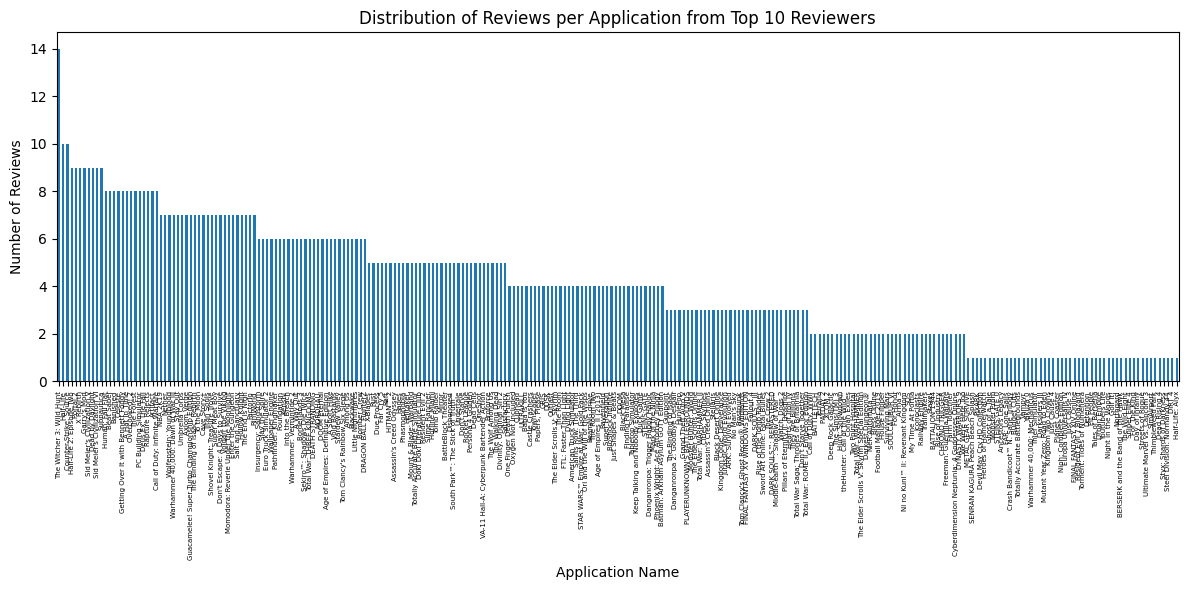

In [29]:
app_review_counts = top_10_reviews.groupby('app_id')['app_id'].count().sort_values(ascending=False)
top_10_reviews_with_names = df[['app_id', 'app_name']].drop_duplicates()

top_appids = app_review_counts.index

app_names_for_plot = top_10_reviews_with_names[top_10_reviews_with_names['app_id'].isin(top_appids)]['app_name'].tolist()

plt.figure(figsize=(12, 6))
app_review_counts.plot(kind='bar')
plt.title('Distribution of Reviews per Application from Top 10 Reviewers')
plt.xlabel('Application Name')
plt.ylabel('Number of Reviews')

plt.xticks(range(len(app_review_counts)), app_names_for_plot, rotation=90, fontsize=5)

plt.tight_layout()
plt.show()

 # [RQ6] Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers

### Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?

First thing, we created a subset with all the reviews submitted by english or spanish users and only the columns that refer to the language, the moment they created or updated the comment, the id of the game, the name of the game and in the end the number of games that the user has.

In [30]:
es6 = df[df['language'].isin(['english', 'spanish'])][['language', 'timestamp_created', 'timestamp_updated', 'author.steamid', 'app_id', 'app_name', 'author.num_games_owned']]
#created a dataset with only the rows and variables that can be useful for exercise 6: only english and spanish people with the variables language, timestamp created, timestamp updated, id of the author, id of the app, a
print(es6.head())

   language  timestamp_created  timestamp_updated     author.steamid  app_id  \
3   english         1611379970         1611379970  76561199054755373  292030   
5   english         1611379264         1611379264  76561198170193529  292030   
6   english         1611379091         1611379091  76561198119302812  292030   
9   spanish         1611377005         1611377005  76561198301724112  292030   
18  english         1611373086         1611373086  76561198065591528  292030   

                    app_name  author.num_games_owned  
3   The Witcher 3: Wild Hunt                       5  
5   The Witcher 3: Wild Hunt                      11  
6   The Witcher 3: Wild Hunt                      27  
9   The Witcher 3: Wild Hunt                      38  
18  The Witcher 3: Wild Hunt                      33  


In [31]:
es6 = es6.copy()
#we create a copy to avoid mistakes that would affect the original dataset
es6['timestamp_modified'] = es6['timestamp_created'] != es6['timestamp_updated']
#creation of new column with boolean values to differ the comments that have been modified and the ones that have not
user_mod = es6.groupby(['author.steamid', 'language']).agg(has_modified=('timestamp_modified', 'max')).reset_index()
mod_rate = user_mod.groupby('language')['has_modified'].mean()
print(mod_rate)

language
english    0.145494
spanish    0.117453
Name: has_modified, dtype: float64


It's more likely that an english user of the Steam platform changes his review about a videogame. The data suggest that about 14.5\% of the comments written by an english user in steam have been updated. Instead, about 11.7\% of the reviews made by a spanish user have been edited or updated on steam platform.

### Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated?

In [32]:
es6prova= es6.groupby(['author.steamid']).tail(1)
print(es6prova.head()) #dataset for exercise

   language  timestamp_created  timestamp_updated     author.steamid  app_id  \
3   english         1611379970         1611379970  76561199054755373  292030   
5   english         1611379264         1611379264  76561198170193529  292030   
18  english         1611373086         1611373086  76561198065591528  292030   
20  english         1611371978         1611371978  76561198996835044  292030   
25  english         1611369121         1611369121  76561198040190687  292030   

                    app_name  author.num_games_owned  timestamp_modified  
3   The Witcher 3: Wild Hunt                       5               False  
5   The Witcher 3: Wild Hunt                      11               False  
18  The Witcher 3: Wild Hunt                      33               False  
20  The Witcher 3: Wild Hunt                     131               False  
25  The Witcher 3: Wild Hunt                      54               False  


In [33]:
eng = es6prova.loc[es6prova['language'] == 'english'].shape[0]
english = es6prova.loc[es6prova['language'] == 'english']
spa = es6prova.loc[es6prova['language'] == 'spanish'].shape[0]
spanish = es6prova.loc[es6prova['language'] == 'spanish']
#let's calculate the spanish and english users, then make the average
geng = english.drop(english['author.num_games_owned'].idxmax())
#I drop the max value, because it's an enormous outlier from the rest of the distribution and it would affect massively the average

print(f"The average number of games that an english user have on his steam library is", ((geng['author.num_games_owned'].sum())/(eng-1)).round(1))
print(f"The average number of games that a spanish user have on his steam library is", ((spanish['author.num_games_owned'].sum())/spa).round(1))

The average number of games that an english user have on his steam library is 119.5
The average number of games that a spanish user have on his steam library is 81.7


English users have almost 40 games, averagely, plus than the spanish ones in their steam library. One possible explanation for the difference in the number of games owned by English and Spanish users on their Steam accounts is that most of the games available on Steam have English as their standard language. This could suggest that more English-speaking individuals are inclined to purchase them, but it's impossible to make a definitive statement.

# [RQ7] Certainly, calculating probabilities and conducting statistical tests are essential skills for any data scientist. Let's calculate some intriguing figures.


### What is the probability of submitting a review and receiving at least one helpful vote from other users?


In [16]:
es7 = df[['votes_helpful', 'recommended', 'author.steamid', 'app_name', 'timestamp_updated', 'author.num_games_owned', 'author.num_reviews']]
es7 = es7.sort_values(by='timestamp_updated', ascending=True)
print(es7.head())

         votes_helpful  recommended     author.steamid     app_name  \
1561509              0         True  76561197969090306  Garry's Mod   
1561508              3         True  76561198030221778  Garry's Mod   
1561504              1         True  76561197988120080  Garry's Mod   
1561503              0         True  76561198026755380  Garry's Mod   
1561501              0         True  76561197976514159  Garry's Mod   

          timestamp_updated  author.num_games_owned  author.num_reviews  
1561509 2010-11-19 20:17:16                     501                  20  
1561508 2010-11-19 20:26:44                     206                   4  
1561504 2010-11-19 21:11:58                     755                  28  
1561503 2010-11-19 21:36:54                     135                  13  
1561501 2010-11-19 21:42:44                     453                   9  


In [17]:
##For this exercise, what we need is only to evaluate the probability, calculating the absolute frequency of the event "submit a review and receive at least
#one helpful vote from other users" and divide this quantity by the total number of the reviews.

prob = es7[es7['votes_helpful'] >= 1].shape[0]/len(es7)
print(f"The probability of submitting a review and receiving at least one helpful vote from other users is", round(prob, 2))

The probability of submitting a review and receiving at least one helpful vote from other users is 0.28


### What is the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app?

In [18]:
# We first calculate the total number of reviews that don't recommend the app. From that, we calculate the number of reviews that don't recommend the app
# and, meanwhile, receive at least one helpful vote from someone else. A condition inserted to avoid any value error is the "else", to be aware of the
# remote possibility to have zero comments non recommended in the dataset.

tot = (es7['recommended'] == False).sum()
prob = ((es7['recommended'] == False) & (es7['votes_helpful'] >= 1)).sum() / tot if tot != 0 else 0

print(f"The probability of receiving at least one helpful vote given a non-recommendation is", round(prob, 2))

The probability of receiving at least one helpful vote given a non-recommendation is 0.48


Almost one in two reviews received a helpful vote if the game was not recommended by the reviewer. This likely happens because reviews that advise against a game, initially considered interesting, tend to be seen as more useful. Users, while scrolling through comments to gain more insight, encounter negative reviews and move on to the next game that might interest them.

### Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? Elaborate on it.


To define two events as statistically independent, we need to assume that the probability of their intersection is equal to the product of their individual probabilities. Specifically, two events A(in our scenario, the probability of the event “a review receiving at least one helpful vote”) and B(in this case “the reviewer has submitted at least five reviews before the current review”) are independent if:

\begin{align}
P(A \cap B) = P(A) \cdot P(B)
\end{align}

This condition means that the occurrence of one event does not affect the probability of the other event.
So, we would need firstly to evaluate the two individual probabilities P(A) and P(B) and their product, thus their intersection $P(A \cap B)$, in the end comparing the twos and see if they match.
In this case the two events seems dependent, because the event B in our case is by definition connected to the event A. The event B means submitting at least the sixth review with at least one helpful vote. If the event A is to submit a review and receive at least one helpful vote, it comes by itself that the two events seems strongly dependent. It seems like event B is the event ""

In [19]:
es7 = es7.copy() #we make a copy of the dataset to avoid any subscription of the original data

In [20]:
#probability of event A
A=es7[es7["votes_helpful"]>=1]
P_A = round(len(A)/len(es7),3)
print(f"The probability of the event 'a review receiving at least one helpful vote', P(A), is", P_A)

#probability of event B
es7['review_count'] = es7.groupby(['author.steamid']).cumcount() + 1
P_B = round(len(es7[es7['review_count'] > 5]) / len(es7), 3)
print(f"The probability to submit the current review after 5 other reviews is", P_B)

#probability of the two separate events at the same time, P(A)*P(B)
print(f"The probability to have separately both events, A and B, is", round(P_A*P_B, 3))

#probability of joint event P(A*B)
P_AB = round(len(es7[(es7['votes_helpful'] >= 1) & (es7['review_count'] > 5)])/len(es7),3)
print(f"The probability of the joint event A insersected B is", P_AB)

if P_A*P_B==P_AB:
    print("The two events are independent")
else:
    print("The two events are not independent")

The probability of the event 'a review receiving at least one helpful vote', P(A), is 0.281
The probability to submit the current review after 5 other reviews is 0.079
The probability to have separately both events, A and B, is 0.022
The probability of the joint event A insersected B is 0.029
The two events are not independent


The two events, "a review receiving at least one helpful vote" and "the reviewer has submitted at least five reviews before the current review", are not independent for the assumptions we have made before. That would suggests that if a user writes a lot of reviews on Steam platform, or at least 6, there is a greater probability to receive at least one helpful vote.

### We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.

Firstly, we can think to create an hypotesis test, with H_0 as the null hypotesis, to state that reviewers who own a larger number of games are likely to leave fewer reviews on the platform, so there is a positive correlation between the number of games that a reviewer owns and the number of reviews submitted to the platform by that user. H_1 is the contrary.

In [21]:
es74 = es7.groupby('author.steamid')[['review_count', 'author.steamid', 'author.num_games_owned']].tail(1)

Creating a subset with only the three variables we are interested in the exercise, because all the variables could affect the speed of coding and the ram that we need to complete the HW. Those data are grouped by author id, to have only a row for every user, very useful for the purpose of evaluating the tendencies of the users.

In [22]:
print((es74['author.num_games_owned'] < 10000).value_counts())
es745 = es74[es74['author.num_games_owned'] < 10000]

author.num_games_owned
True     12406267
False         293
Name: count, dtype: int64


I eliminate all values of games owned over 10000, because they are arguably outliers, and their values can affect the correlation value, even if they are only a few users, just under 300 units, a very little number compared to the million and 200 thousands of total users that have submitted at least one review during 2021.

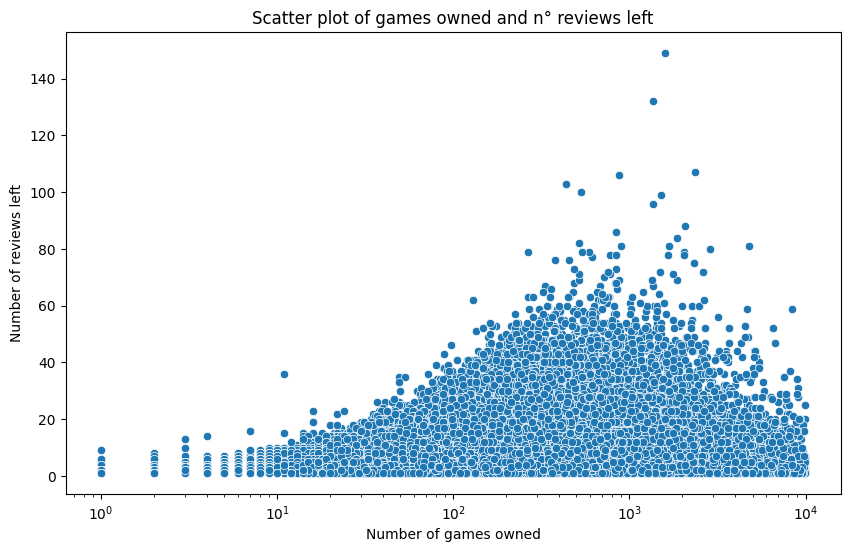

In [23]:
from scipy.stats import pearsonr

plt.figure(figsize=(10, 6))
sns.scatterplot(data=es745, x='author.num_games_owned', y='review_count')
plt.xscale('log')
plt.title("Scatter plot of games owned and n° reviews left")
plt.xlabel("Number of games owned")
plt.ylabel("Number of reviews left")
plt.show()

In [24]:
# Calculate Pearson and Spearman Correlation
corr, p_value = pearsonr(es745['author.num_games_owned'], es745['review_count'])
print(f"Pearson Correlation and P-value:", round(corr,4), p_value)
# Interpretation: we are calculating if the correlation between the two variables exists and is significant statiatically.
# To ensure this, we need to evaluate P-value on correlation coefficient, and if its result is under 0.05,
# we have a statistical evidence that Pearson coefficient is useful in this example.
if p_value < 0.05:
    if corr < -0.2:
        print("There is a statistically significant negative correlation, supporting the hypothesis.")
    elif corr> 0.2:
        print("There is a statistically significant positive correlation, which does not support the hypothesis.")
    else:
        print("There is, with statistical significance, no correlation between the number of games and reviews.")
else:
    print("No significant correlation found, thus we fail to support the hypothesis.")

#The P-Value is well over 0.05, so the correlation coefficient can not be considered as a statistically significant value this time.
#The result of the correlation coefficient wolud be against the null hypotesis in the end, but we can not say anything else because the
#correlation is not significant.

Pearson Correlation and P-value: 0.2292 0.0
There is a statistically significant positive correlation, which does not support the hypothesis.


In [25]:
corrt, p_valuet = pearsonr(es74['author.num_games_owned'], es74['review_count'])
#These are the values of the Pearson correlation coefficient and the associated p-value for the entire dataset.
#This is done to compare the results with those from the dataset cleaned of outliers
print(round(corrt, 3), round(p_valuet,3))
#The full dataset provides values that are completely different from those of the outlier-free dataset.
#The correlation is essentially negligible, while the p-value undermines the validity of the coefficient itself,
#with a value of nearly 0.6, invalidating the result and consequently rendering the analysis of the entire dataset insignificant.

0.0 0.584


In the end, the data provides a significant positive correlation bet the scatter plot distribution is quite controversial. From the graph, it appears that there is indeed a positive correlation between the number of games owned and the number of reviews submitted. However, around the point where the number of games owned reaches 10^3, a trend reversal occurs, with values increasingly clustering around a low number of reviews submitted.

### Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis. Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM?

### 1. Histograms
*Purpose*  
Display the distribution of a continuous variable by dividing the data into bins (intervals).  

*Insights*  
- Helps visualize the frequency distribution of data points.
- Reveals the shape of the distribution (e.g., normal, skewed, bimodal).
- Identifies outliers and trends in data spread, aiding in understanding central tendency and variability.

### 2. Bar Plots
*Purpose*  
Compare different categories by showing their values or frequencies.

*Insights*  
- Clearly illustrates differences between groups, making it easy to see which categories are larger or smaller.
- Useful for visualizing categorical data and identifying trends or patterns.
- Helps in detecting outliers or notable differences across categories.

### 3. Scatterplots
*Purpose*  
Show the relationship between two continuous variables by plotting points on a Cartesian plane.

*Insights*  
- Reveals correlations (positive, negative, or none) between variables.
- Helps identify trends, clusters, and potential outliers.
- Essential for regression analysis and understanding relationships in data.

### 4. Pie Charts
*Purpose*  
Represent the proportions of a whole, displaying each category as a slice of a pie.

*Insights*  
- Highlights the relative size of each category compared to the total.
- Useful for visualizing part-to-whole relationships.
- Less effective for detailed comparisons but can effectively show composition at a glance.

The analysis performed by the LLM tool provides an initial overview of the purpose and types of analysis that each of these four charts can accomplish. Histograms are especially useful in the preliminary phase of analysis to determine which statistical tools to use in subsequent steps. For example, understanding the distribution of a given variable allows us to assess the suitability of specific tools, such as hypothesis tests and related statistics, to validate a hypothesis. For what may concern barplot,an additional advantage of bar plots is their flexibility, as they can represent not only frequencies but also other statistics, such as means or sums, making them useful for various analyses. On the other hand, an additional drawback is that they do not provide information about the distribution within each category, limiting themselves to showing only aggregated values, which may conceal significant details. A disadvantage of scatterplots is that they can become cluttered and unclear when there is a high density of points, as overlapping points can obscure the actual relationships between the variables. This makes it difficult for the viewer to understand emerging trends and patterns, so making difficult to really understand which analysis are possible on the dataset. For what may concern pie charts, they have an additional advantage in the ability to provide an immediate representation of the relative proportions of different categories, making it easy for the viewer to quickly understand the overall composition. However, a disadvantage is that they become less effective when there are too many categories, as the slices can become too small and difficult to distinguish, complicating the identification of significant differences between the various parts.

### **Algorithmic Question (AQ)**

You are given two positive integers, $n$
 (where $1≤n≤10^9$) and $k$ (where $q≤k≤100$). Your task is to express
$n$ as the sum of $k$ positive integers, all having the same parity (i.e., all have the same remainder when divided by 2, meaning they are either all even or all odd). In other words, find $a_1,a_2,...,a_k$ each
$a_i>0,n=a_1+a_2+...+a_k$, and all $a_i$ simultaneously are either even or odd. If it's impossible to represent $n$ in this way, report that no such representation exists.

## 1.	Python program:
The aim of the provided code is to represent whether an integer n can be a sum of an integer k, and to return a valid sequence of integers.  If such a sequence is possible to return with a certain result:


In [3]:
def find_representation(t, test_cases):
    results = []
    for case in test_cases:
        # Ensure the case has exactly two values (n and k)
        if len(case) == 2:
            n, k = case

            # Check if n and k are within the valid range
            if not (1 <= n <= 10**9) or not (1 <= k <= 100):
                results.append("Error: Invalid input values")
                continue
            # Check if we can use k odd numbers
            if n >= k and (n % 2 == k % 2):
                # We can use k odd numbers
                results.append("YES")
                results.append(" ".join(["1"] * (k - 1) + [str(n - (k - 1))]))

            # Check if we can use k even numbers
            elif n >= 2 * k and n % 2 == 0:
                # We can use k even numbers
                results.append("YES")
                results.append(" ".join(["2"] * (k - 1) + [str(n - 2 * (k - 1))]))

            # If neither condition is met, no solution
            else:
                results.append("NO")
        else:
            # Handle incorrect input format for each case
            results.append("Error: Invalid input format")

    return "\n".join(results)

# Read input
t = int(input().strip())
test_cases = [tuple(map(int, input().split())) for _ in range(t)]

# Get results and print
print(find_representation(t, test_cases))


 8 
 10 3
 100 4
 8 7
 97 2
 8 8
 3 10
 5 3
 


YES
2 2 6
YES
1 1 1 97
NO
NO
YES
1 1 1 1 1 1 1 1
NO
YES
1 1 3
Error: Invalid input format


### **2. Time complexity using Big O notation**
Code Breakdown and Time Complexity Analysis
1. Loop through test cases:

- The function processes each test case in test_cases using a for loop.

- Given $t$ test cases, the outer loop runs $t$ times, contributing $O(t)$
to the time complexity.

2. Input validity check:

- For each test case, the function checks if $n$ and $k$ are within a specific range.

- This check consists of a few simple comparisons, so it takes constant time $O(1)$ per test case.

3. Conditional checks:

- The function performs two main conditional checks to decide if $n$ can be represented as the sum of $k$ odd or $k$ even integers.
    - Checking if $n≥kn≥k$ and if $n%2==k%2$ (for odd numbers) is $O(1)$.
    - Checking if $n≥2⋅k$ and if $n%2==0$ (for even numbers) is also $O(1)$.

- Since both conditions involve basic arithmetic operations, they each take constant time, or $O(1)$, for each test case.

4. Generating the result string:

- If a condition is met, the function constructs a result string by:
    - Creating a list of $k$ elements (either $["1"] * (k - 1)$ or $["2"] * (k - 1)$). This requires $O(k)$ operations.
    - Appending an additional number to the list, which is $O(1)$.
    - Joining the list into a single string, which also takes $O(k)$.
- Thus, generating the result for each test case takes $O(k)$ in the worst case.

5. Final join operation:

- After processing all test cases, the function combines all strings in results using "\n".join(results).
- If we assume each result string could be up to $k$ characters long, this join operation is $O(t⋅k)$nin the worst case.

## **Overall Time Complexity**

Since the function loops over $t$ test cases and each test case can take up to $O(k)$ operations to generate the result string, the total time complexity is:

\begin{equation}
O(t⋅k)
\end{equation}

where:

- $t$ is the number of test cases, and

- $k$ is the maximum number of integers in the result for each test case.


### **3.	AI Evaluation of Time complexity:**

* ChatGPT:Is This Assessment Accurate?
Yes, the previous analysis was accurate. The time complexity $O(t⋅k)$ reflects both the number of test cases $t$ and the size $k$ of the list generated in each case.
The reasoning for $O(t⋅k)$ is based on the fact that each test case may require $O(k)$ operations for list creation and string joining, and this work is done for each of the $t$ test cases. Therefore, $O(t⋅k)$ is indeed the correct time complexity.

* Perplexity: Combining all parts, the overall time complexity of the entire program can be summarized as: $O(t*k)$ This indicates that the performance of the code depends linearly on both the number of test cases $t$ and the value of $k$ for each test case.


* Going through two sources of AI that demonstrate the same result of time complexity of our code as $O(t*k)$ confirms to accurate result of time complexity that preformed the factors of the given integers and constant time of the code operations.
